<a href="https://colab.research.google.com/github/muhammadalfateh6/Muhammad_Alfateh_Work/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from dataclasses import replace
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import svm
import tensorflow as tf
from tensorflow import keras

In [ ]:
data = pd.read_csv('hddd.csv')

In [ ]:
for column in data:
    print(f'{column} : {data[column].unique()}')

HeartDisease : ['No' 'Yes']
BMI : [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking : ['Yes' 'No']
AlcoholDrinking : ['No' 'Yes']
Stroke : ['No' 'Yes']
PhysicalHealth : [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth : [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
DiffWalking : ['No' 'Yes']
Sex : ['Female' 'Male']
AgeCategory : ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race : ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic : ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity : ['Yes' 'No']
GenHealth : ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
SleepTime : [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Asthma : ['Yes' 'No']

In [ ]:
yes_no_columns= ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Diabetic','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']

In [ ]:
data.replace({'Female': 0, 'Male': 1}, inplace=True)
data.replace({'White': 0.2, 'Black': 0.4, 'Asian': 0.6, 'American Indian/Alaskan Native': 0.8,'Hispanic': 0.9, 'Other': 1 }, inplace=True)
data.replace({'No, borderline diabetes': 'No', 'Yes (during pregnancy)': 'Yes'}, inplace=True)
data.replace({'Poor': 0.2, 'Fair': 0.4,'Good': 0.6,'Very good': 0.8,'Excellent':1 }, inplace=True)
data.replace({'55-59': 57,'80 or older': 85,'65-69': 67,'75-79':77,'40-44': 42,'70-74': 72,'60-64': 62,'50-54': 52,'45-49':47,'18-24': 21,'35-39':37,'30-34':32,'25-29':27}, inplace=True)
data.replace({'Yes': 1, 'No': 0}, inplace=True)

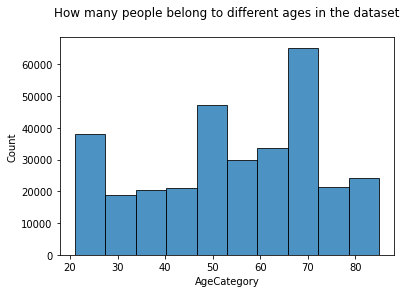

In [ ]:
from matplotlib import pyplot as plt
plt.hist(data["AgeCategory"],edgecolor='black',alpha=0.8)
plt.xlabel("AgeCategory")
plt.ylabel("Count")
plt.title("How many people belong to different ages in the dataset\n")

plt.show()

In [ ]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,57,0.2,1,1,0.8,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,85,0.2,0,1,0.8,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,67,0.2,1,1,0.4,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,77,0.2,0,0,0.6,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,42,0.2,0,1,0.8,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,62,0.9,1,0,0.4,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,37,0.9,0,1,0.8,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,47,0.9,0,1,0.6,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,27,0.9,0,0,0.6,12.0,0,0,0


In [ ]:
for col in yes_no_columns:
    data[col].replace({'Yes': 1, 'No': 0}, inplace=True)

In [ ]:
scale_columns = ['BMI','PhysicalHealth','MentalHealth','SleepTime','AgeCategory']
scaler = MinMaxScaler()
data[scale_columns] = scaler.fit_transform(data[scale_columns])
 
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.055294,1,0,0,0.100000,1.0,0,0,0.562500,0.2,1,1,0.8,0.173913,1,0,1
1,0,0.100447,0,0,1,0.000000,0.0,0,0,1.000000,0.2,0,1,0.8,0.260870,0,0,0
2,0,0.175782,1,0,0,0.666667,1.0,0,1,0.718750,0.2,1,1,0.4,0.304348,1,0,0
3,0,0.147169,0,0,0,0.000000,0.0,0,0,0.875000,0.2,0,0,0.6,0.217391,0,0,1
4,0,0.141132,0,0,0,0.933333,0.0,1,0,0.328125,0.2,0,1,0.8,0.304348,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,0.185802,1,0,0,0.233333,0.0,1,1,0.640625,0.9,1,0,0.4,0.217391,1,0,0
319791,0,0.215139,1,0,0,0.000000,0.0,0,1,0.250000,0.9,0,1,0.8,0.173913,1,0,0
319792,0,0.147531,0,0,0,0.000000,0.0,0,0,0.406250,0.9,0,1,0.6,0.217391,0,0,0
319793,0,0.250996,0,0,0,0.000000,0.0,0,0,0.093750,0.9,0,0,0.6,0.478261,0,0,0


In [ ]:
x =data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int64

**Visuals**

0    292422
1     27373
Name: HeartDisease, dtype: int64


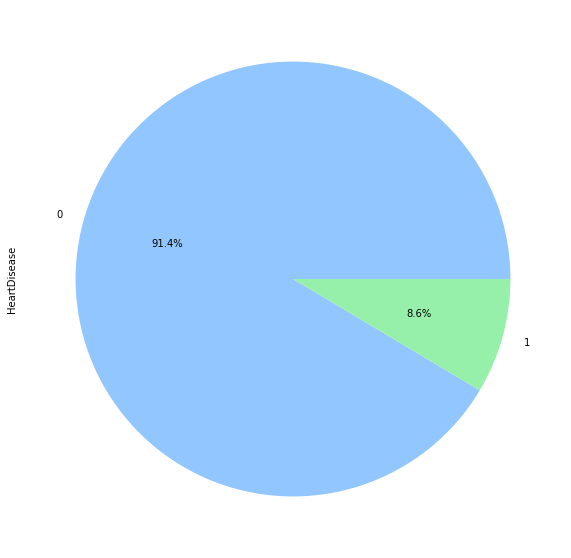

In [ ]:
print(data["HeartDisease"].value_counts())
data["HeartDisease"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

In [ ]:
data.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
HeartDisease,319795.000000,0.085595,0.279766,0.000000,0.000000,0.000000,0.000000,1.000000
BMI,319795.000000,0.196854,0.076737,0.000000,0.144996,0.184957,0.234215,1.000000
Smoking,319795.000000,0.412477,0.492281,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholDrinking,319795.000000,0.068097,0.251912,0.000000,0.000000,0.000000,0.000000,1.000000
Stroke,319795.000000,0.037740,0.190567,0.000000,0.000000,0.000000,0.000000,1.000000
PhysicalHealth,319795.000000,0.112390,0.265028,0.000000,0.000000,0.000000,0.066667,1.000000
MentalHealth,319795.000000,0.129946,0.265175,0.000000,0.000000,0.000000,0.100000,1.000000
DiffWalking,319795.000000,0.138870,0.345812,0.000000,0.000000,0.000000,0.000000,1.000000
Sex,319795.000000,0.475273,0.499389,0.000000,0.000000,0.000000,1.000000,1.000000
AgeCategory,319795.000000,0.527084,0.286039,0.000000,0.328125,0.562500,0.718750,1.000000


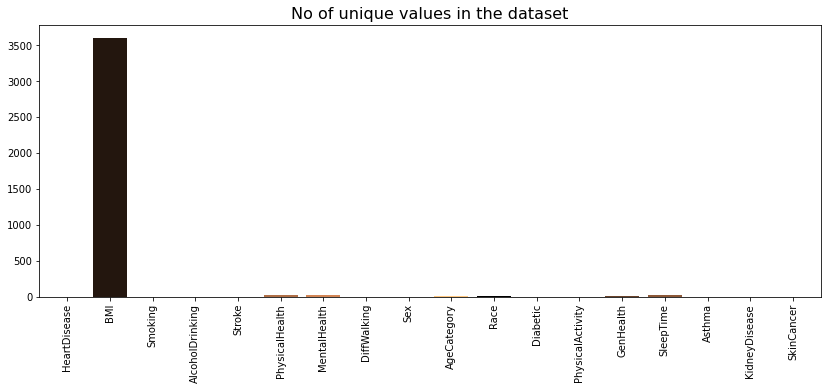

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               2
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64


In [ ]:

import numpy as np
color = plt.cm.copper(np.linspace(0, 1, 10))
plt.figure(figsize=(14,5))
data.nunique().plot(kind='bar', width=.8, color=color)
plt.title('No of unique values in the dataset', size=16)
plt.show()
print(data.nunique())

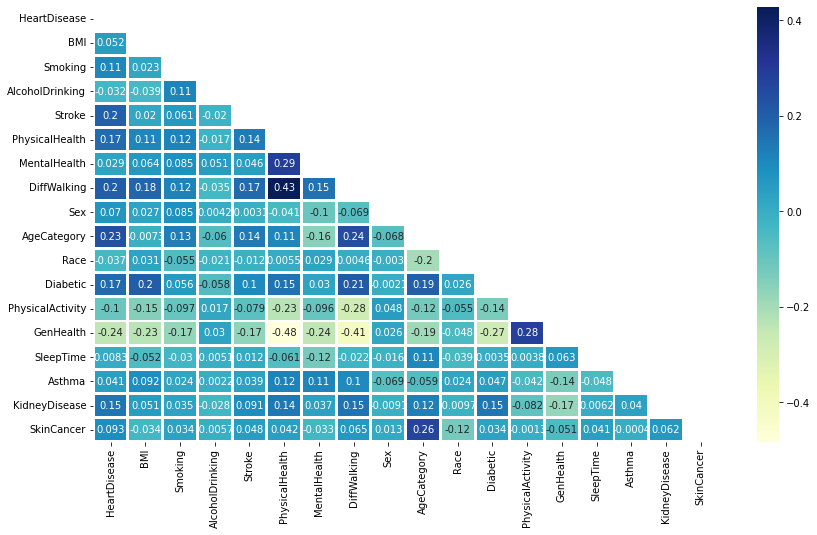

In [ ]:
import seaborn as sns
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), mask=np.triu(data.corr()), annot=True, cmap='YlGnBu',linewidth=2)
plt.show()

Text(0.5, 1.0, 'Plot show the count according to the Heart Diease')

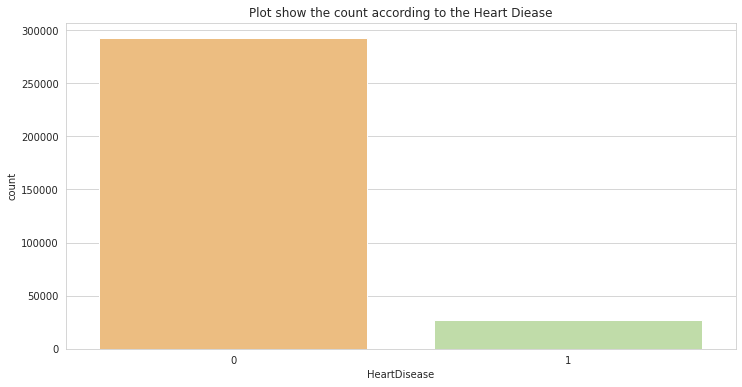

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(x="HeartDisease", data=data, palette='Spectral');
plt.title("Plot show the count according to the Heart Diease")

Text(0.5, 1.0, 'Plot show the count according to the Gender')

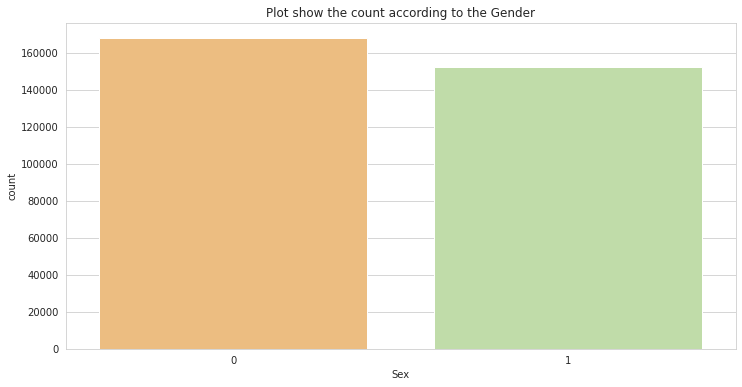

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(x="Sex", data=data, palette='Spectral');
plt.title("Plot show the count according to the Gender")

In [ ]:
discrette_feature = [i for i in data.columns if data[i].nunique() < 10]
continuous_feature = [i for i in data.columns if data[i].nunique() > 10]
print(f'discrette feature: {discrette_feature}')
print(f'continuous feature: {continuous_feature}')

discrette feature: ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
continuous feature: ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']


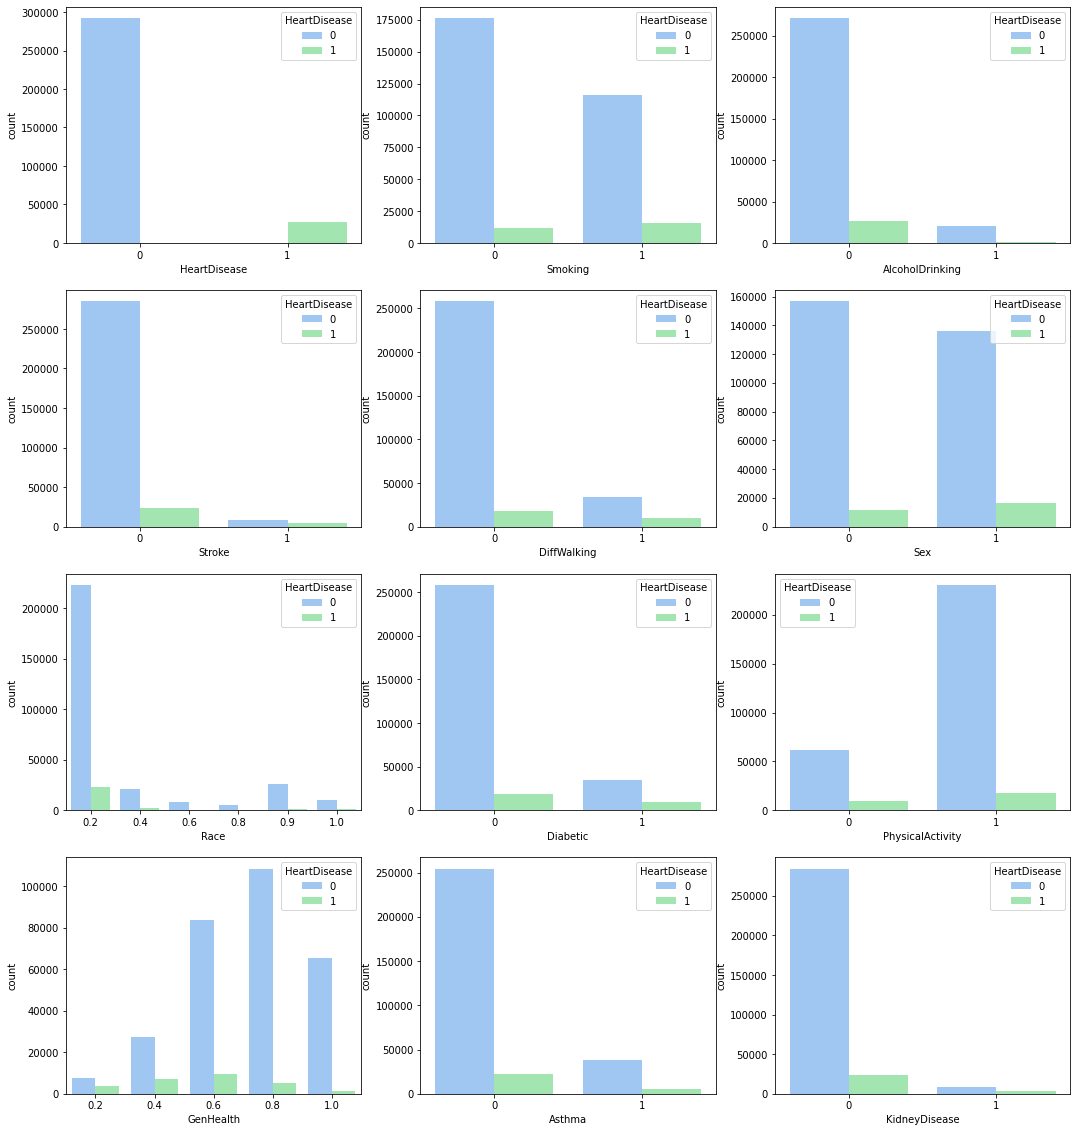

In [ ]:
plt.style.use(plt.style.available[19])
i = 1
plt.figure(figsize=(18,20)) 
for feature in discrette_feature[:-1]:
    plt.subplot(4, 3, i)
    sns.countplot(x=data[feature], hue=data.HeartDisease)
    i += 1
    
plt.show()

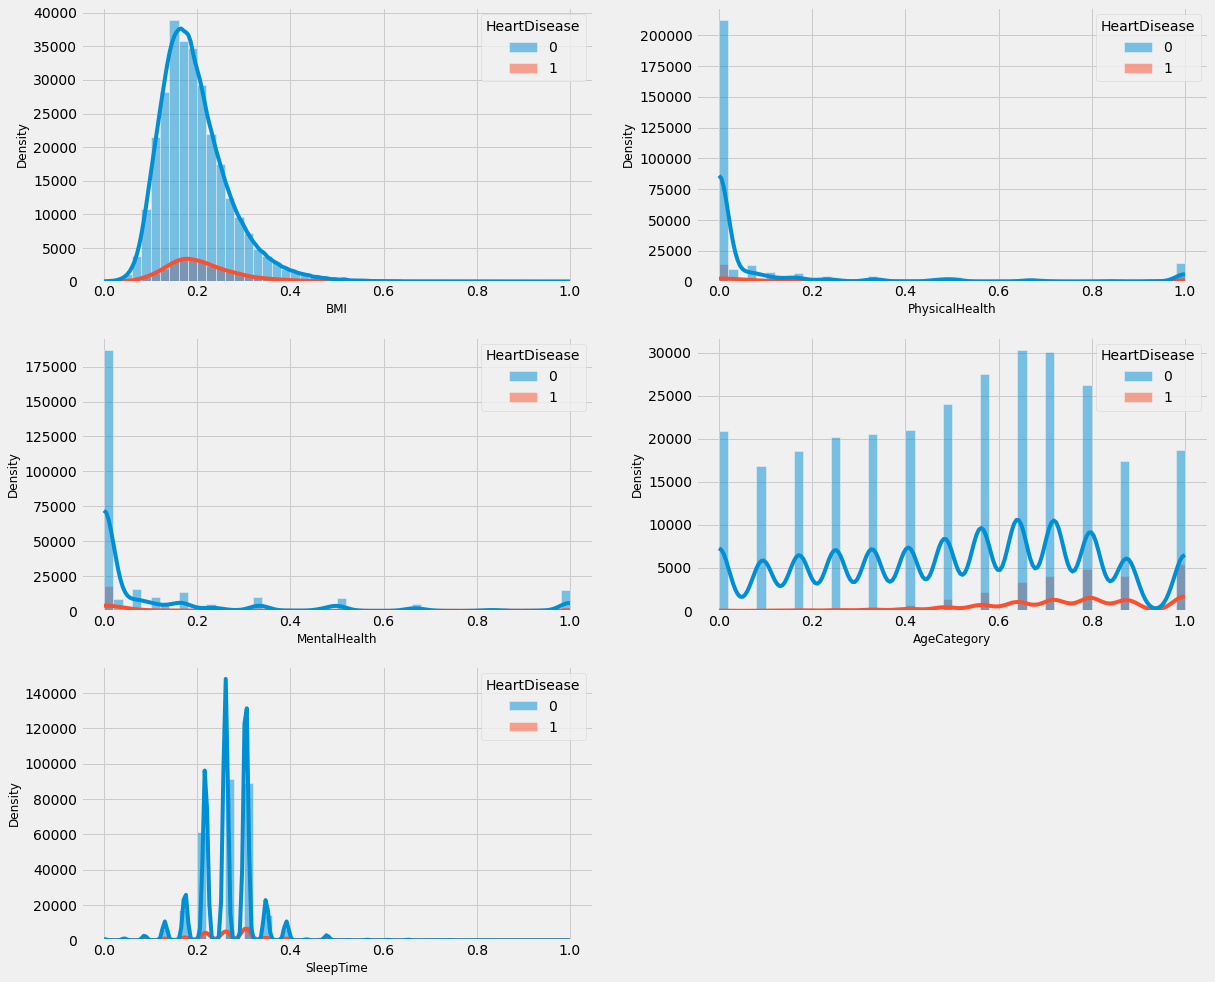

In [ ]:
plt.style.use('fivethirtyeight')
i = 1
plt.figure(figsize=(18,16)) 
for feature in continuous_feature:
    plt.subplot(3, 2, i)
    sns.histplot(x=data[feature],kde=True,bins=50, hue=data.HeartDisease)
    plt.xlabel(feature,size=12)
    plt.ylabel("Density",size=12)
    i += 1
    
plt.show()

In [ ]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
myList1 = []
model1 = RandomForestClassifier()
model1.fit(x_train, y_train)
prediction= model1.predict(x_test)
rfc_results=accuracy_score(y_test, prediction)
#Score Report
print(classification_report(y_test, prediction))
myList1.append(rfc_results)
from sklearn.metrics import confusion_matrix
# Confusion Matrices 
print(confusion_matrix(y_test,prediction))


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58540
           1       0.37      0.13      0.19      5419

    accuracy                           0.91     63959
   macro avg       0.65      0.55      0.57     63959
weighted avg       0.88      0.91      0.89     63959

[[57357  1183]
 [ 4728   691]]


In [ ]:
accuracy_score(y_test, prediction)


0.9073937991525821

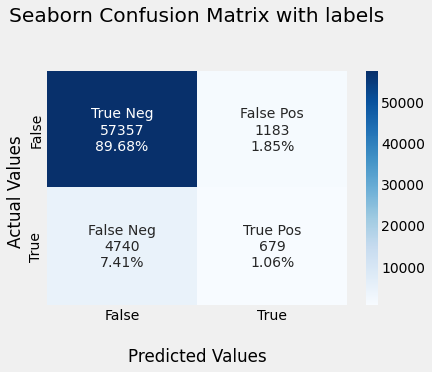

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
confusion_matrix = metrics.confusion_matrix(y_test, prediction)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

**K-NeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
myList2 = []
model2  = KNeighborsClassifier(n_neighbors=7)
model2.fit(x_train, y_train)
testing= model2.predict(x_test)
accuracy_score(y_test, prediction)
knn_results=accuracy_score(y_test, testing)
myList2.append(knn_results)

#Score Report
print(classification_report(y_test, prediction))
# Confusion Matrices 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,prediction))


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58540
           1       0.37      0.13      0.19      5419

    accuracy                           0.91     63959
   macro avg       0.65      0.55      0.57     63959
weighted avg       0.88      0.91      0.89     63959

[[57357  1183]
 [ 4728   691]]


In [ ]:
accuracy_score(y_test, testing)

0.9102081020653856

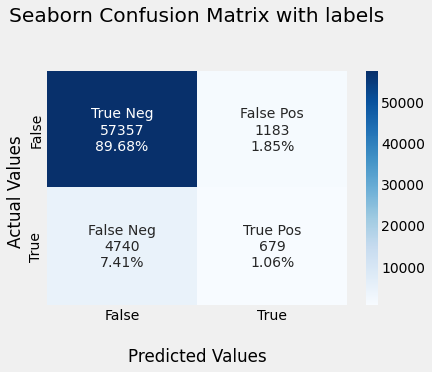

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
confusion_matrix = metrics.confusion_matrix(y_test, prediction)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Decision Tree**

In [ ]:
myList3 = []
model3 = DecisionTreeClassifier()
model3.fit(x_train, y_train)

pred =model3.predict(x_test)
dtree_results= accuracy_score(y_test, pred)
myList3.append(dtree_results)

#Score Report
print(classification_report(y_test, pred))
# Confusion Matrices 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     58540
           1       0.23      0.25      0.24      5419

    accuracy                           0.86     63959
   macro avg       0.58      0.59      0.58     63959
weighted avg       0.87      0.86      0.87     63959

[[57357  1183]
 [ 4728   691]]


In [ ]:
accuracy_score(y_test, testing)

0.9102081020653856

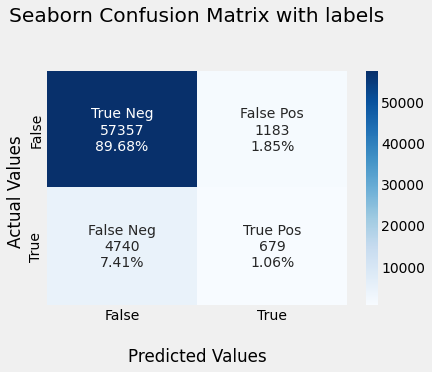

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
confusion_matrix = metrics.confusion_matrix(y_test, prediction)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Naive Bias**

In [ ]:
from sklearn.naive_bayes import GaussianNB

myList4 = []
model4 = GaussianNB()
model4.fit(x_train, y_train)
prediction= model4.predict(x_test)
gnb_results= accuracy_score(y_test, pred)
myList3.append(gnb_results)

#Score Report
print(classification_report(y_test, prediction))
from sklearn.metrics import confusion_matrix
# Confusion Matrices 
print(confusion_matrix(y_test,prediction))


              precision    recall  f1-score   support

           0       0.95      0.88      0.91     58540
           1       0.27      0.48      0.34      5419

    accuracy                           0.84     63959
   macro avg       0.61      0.68      0.63     63959
weighted avg       0.89      0.84      0.86     63959

[[51414  7126]
 [ 2828  2591]]


In [ ]:

accuracy_score(y_test, prediction)


0.8443690489219656

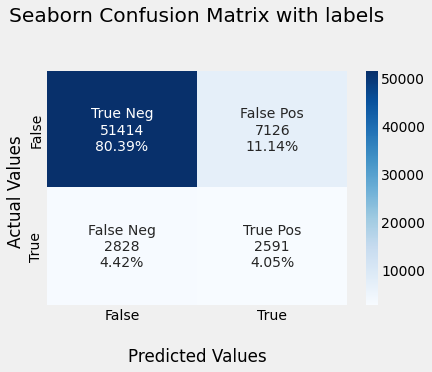

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
confusion_matrix = metrics.confusion_matrix(y_test, prediction)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

**SVM**

In [ ]:
myList5 = []
model = svm.SVC(kernel='poly')
model.fit(x_train, y_train)
predictions=model.predict(x_test)
svm_results= accuracy_score(y_test, pred)
myList5.append(svm_results)


#Score Report
print(classification_report(y_test, prediction))
from sklearn.metrics import confusion_matrix
# Confusion Matrices 
print(confusion_matrix(y_test,prediction))

In [ ]:

accuracy_score(y_test, predictions)

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
confusion_matrix = metrics.confusion_matrix(y_test, prediction)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

**ANN**

In [ ]:
myList6 =[]
def nn():
        model = keras.Sequential([
        keras.layers.Dense(68, input_shape=(17,), activation= 'sigmoid'),
        keras.layers.Dense(34, activation='sigmoid'),
        keras.layers.Dense(1, activation= 'sigmoid')])
        return model


In [ ]:

myList6.append(model)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
reduce_lr = ReduceLROnPlateau()
early_stopping = EarlyStopping(patience=20, min_delta=0.0001)

model.fit(x_train, y_train, epochs=700,callbacks=[reduce_lr, early_stopping], verbose=1)

Epoch 1/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2378 - accuracy: 0.9145

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2378 - accuracy: 0.9145 - lr: 0.0010
Epoch 2/700
7976/7995 [============================>.] - ETA: 0s - loss: 0.2279 - accuracy: 0.9152

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2279 - accuracy: 0.9152 - lr: 0.0010
Epoch 3/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2276 - accuracy: 0.9155

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2276 - accuracy: 0.9155 - lr: 0.0010
Epoch 4/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2274 - accuracy: 0.9155

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2274 - accuracy: 0.9155 - lr: 0.0010
Epoch 5/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2271 - accuracy: 0.9155

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2271 - accuracy: 0.9155 - lr: 0.0010
Epoch 6/700
7978/7995 [============================>.] - ETA: 0s - loss: 0.2269 - accuracy: 0.9159

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2269 - accuracy: 0.9159 - lr: 0.0010
Epoch 7/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2266 - accuracy: 0.9156

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2266 - accuracy: 0.9156 - lr: 0.0010
Epoch 8/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2265 - accuracy: 0.9158

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2265 - accuracy: 0.9158 - lr: 0.0010
Epoch 9/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2263 - accuracy: 0.9157

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2263 - accuracy: 0.9157 - lr: 0.0010
Epoch 10/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2262 - accuracy: 0.9157

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2262 - accuracy: 0.9157 - lr: 0.0010
Epoch 11/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2261 - accuracy: 0.9157

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2261 - accuracy: 0.9157 - lr: 0.0010
Epoch 12/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2260 - accuracy: 0.9159

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2261 - accuracy: 0.9158 - lr: 0.0010
Epoch 13/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2260 - accuracy: 0.9158

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2260 - accuracy: 0.9158 - lr: 0.0010
Epoch 14/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2259 - accuracy: 0.9159

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2259 - accuracy: 0.9159 - lr: 0.0010
Epoch 15/700
7973/7995 [============================>.] - ETA: 0s - loss: 0.2258 - accuracy: 0.9158

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2258 - accuracy: 0.9158 - lr: 0.0010
Epoch 16/700
7977/7995 [============================>.] - ETA: 0s - loss: 0.2257 - accuracy: 0.9159

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2258 - accuracy: 0.9158 - lr: 0.0010
Epoch 17/700
7978/7995 [============================>.] - ETA: 0s - loss: 0.2257 - accuracy: 0.9160

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2258 - accuracy: 0.9159 - lr: 0.0010
Epoch 18/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2258 - accuracy: 0.9159

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2258 - accuracy: 0.9159 - lr: 0.0010
Epoch 19/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2257 - accuracy: 0.9158

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2256 - accuracy: 0.9158 - lr: 0.0010
Epoch 20/700
7976/7995 [============================>.] - ETA: 0s - loss: 0.2256 - accuracy: 0.9159

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2256 - accuracy: 0.9159 - lr: 0.0010
Epoch 21/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2256 - accuracy: 0.9160

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2256 - accuracy: 0.9160 - lr: 0.0010
Epoch 22/700
7979/7995 [============================>.] - ETA: 0s - loss: 0.2257 - accuracy: 0.9159

7995/7995 [==============================] - 16s 2ms/step - loss: 0.2256 - accuracy: 0.9159 - lr: 0.0010
Epoch 23/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2255 - accuracy: 0.9159

7995/7995 [==============================] - 16s 2ms/step - loss: 0.2255 - accuracy: 0.9159 - lr: 0.0010
Epoch 24/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2254 - accuracy: 0.9159

7995/7995 [==============================] - 16s 2ms/step - loss: 0.2255 - accuracy: 0.9159 - lr: 0.0010
Epoch 25/700
7971/7995 [============================>.] - ETA: 0s - loss: 0.2254 - accuracy: 0.9160

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2255 - accuracy: 0.9160 - lr: 0.0010
Epoch 26/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2255 - accuracy: 0.9159

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2255 - accuracy: 0.9160 - lr: 0.0010
Epoch 27/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2253 - accuracy: 0.9161

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2253 - accuracy: 0.9161 - lr: 0.0010
Epoch 28/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2253 - accuracy: 0.9161

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2254 - accuracy: 0.9161 - lr: 0.0010
Epoch 29/700
7978/7995 [============================>.] - ETA: 0s - loss: 0.2254 - accuracy: 0.9159

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2253 - accuracy: 0.9159 - lr: 0.0010
Epoch 30/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2253 - accuracy: 0.9161

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2254 - accuracy: 0.9161 - lr: 0.0010
Epoch 31/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2253 - accuracy: 0.9160

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2253 - accuracy: 0.9160 - lr: 0.0010
Epoch 32/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2252 - accuracy: 0.9160

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2252 - accuracy: 0.9160 - lr: 0.0010
Epoch 33/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2252 - accuracy: 0.9160

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2252 - accuracy: 0.9160 - lr: 0.0010
Epoch 34/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2252 - accuracy: 0.9161

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2252 - accuracy: 0.9161 - lr: 0.0010
Epoch 35/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2252 - accuracy: 0.9160

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2252 - accuracy: 0.9160 - lr: 0.0010
Epoch 36/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2251 - accuracy: 0.9160

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2251 - accuracy: 0.9160 - lr: 0.0010
Epoch 37/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2250 - accuracy: 0.9162

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2251 - accuracy: 0.9162 - lr: 0.0010
Epoch 38/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2251 - accuracy: 0.9161

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2251 - accuracy: 0.9161 - lr: 0.0010
Epoch 39/700
7979/7995 [============================>.] - ETA: 0s - loss: 0.2250 - accuracy: 0.9161

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2250 - accuracy: 0.9161 - lr: 0.0010
Epoch 40/700
7977/7995 [============================>.] - ETA: 0s - loss: 0.2249 - accuracy: 0.9160

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2250 - accuracy: 0.9160 - lr: 0.0010
Epoch 41/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2250 - accuracy: 0.9161

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2250 - accuracy: 0.9161 - lr: 0.0010
Epoch 42/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2250 - accuracy: 0.9161

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2251 - accuracy: 0.9161 - lr: 0.0010
Epoch 43/700
7974/7995 [============================>.] - ETA: 0s - loss: 0.2249 - accuracy: 0.9163

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2249 - accuracy: 0.9163 - lr: 0.0010
Epoch 44/700
7974/7995 [============================>.] - ETA: 0s - loss: 0.2249 - accuracy: 0.9161

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2250 - accuracy: 0.9161 - lr: 0.0010
Epoch 45/700
7976/7995 [============================>.] - ETA: 0s - loss: 0.2249 - accuracy: 0.9161

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2249 - accuracy: 0.9161 - lr: 0.0010
Epoch 46/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2248 - accuracy: 0.9161

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2248 - accuracy: 0.9161 - lr: 0.0010
Epoch 47/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2248 - accuracy: 0.9161

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2249 - accuracy: 0.9161 - lr: 0.0010
Epoch 48/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2249 - accuracy: 0.9160

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2249 - accuracy: 0.9160 - lr: 0.0010
Epoch 49/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2249 - accuracy: 0.9161

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2249 - accuracy: 0.9162 - lr: 0.0010
Epoch 50/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2248 - accuracy: 0.9162

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2248 - accuracy: 0.9162 - lr: 0.0010
Epoch 51/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2248 - accuracy: 0.9161

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2249 - accuracy: 0.9161 - lr: 0.0010
Epoch 52/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2248 - accuracy: 0.9161

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2247 - accuracy: 0.9162 - lr: 0.0010
Epoch 53/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2248 - accuracy: 0.9162

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2248 - accuracy: 0.9162 - lr: 0.0010
Epoch 54/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2248 - accuracy: 0.9162

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2248 - accuracy: 0.9162 - lr: 0.0010
Epoch 55/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2247 - accuracy: 0.9163

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2248 - accuracy: 0.9163 - lr: 0.0010
Epoch 56/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2247 - accuracy: 0.9162

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2247 - accuracy: 0.9162 - lr: 0.0010
Epoch 57/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2247 - accuracy: 0.9163

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2247 - accuracy: 0.9163 - lr: 0.0010
Epoch 58/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2247 - accuracy: 0.9162

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2247 - accuracy: 0.9162 - lr: 0.0010
Epoch 59/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2246 - accuracy: 0.9164

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2246 - accuracy: 0.9164 - lr: 0.0010
Epoch 60/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2246 - accuracy: 0.9162

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2246 - accuracy: 0.9162 - lr: 0.0010
Epoch 61/700
7975/7995 [============================>.] - ETA: 0s - loss: 0.2247 - accuracy: 0.9162

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2246 - accuracy: 0.9162 - lr: 0.0010
Epoch 62/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2246 - accuracy: 0.9163

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2246 - accuracy: 0.9163 - lr: 0.0010
Epoch 63/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2245 - accuracy: 0.9163

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2245 - accuracy: 0.9163 - lr: 0.0010
Epoch 64/700
7978/7995 [============================>.] - ETA: 0s - loss: 0.2246 - accuracy: 0.9162

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2245 - accuracy: 0.9162 - lr: 0.0010
Epoch 65/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2245 - accuracy: 0.9161

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2245 - accuracy: 0.9161 - lr: 0.0010
Epoch 66/700
7972/7995 [============================>.] - ETA: 0s - loss: 0.2246 - accuracy: 0.9163

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2245 - accuracy: 0.9163 - lr: 0.0010
Epoch 67/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2245 - accuracy: 0.9162

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2245 - accuracy: 0.9162 - lr: 0.0010
Epoch 68/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2244 - accuracy: 0.9163

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2244 - accuracy: 0.9163 - lr: 0.0010
Epoch 69/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2245 - accuracy: 0.9163

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2244 - accuracy: 0.9163 - lr: 0.0010
Epoch 70/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2243 - accuracy: 0.9163

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2244 - accuracy: 0.9163 - lr: 0.0010
Epoch 71/700
7978/7995 [============================>.] - ETA: 0s - loss: 0.2244 - accuracy: 0.9164

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2244 - accuracy: 0.9164 - lr: 0.0010
Epoch 72/700
7979/7995 [============================>.] - ETA: 0s - loss: 0.2243 - accuracy: 0.9163

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2244 - accuracy: 0.9163 - lr: 0.0010
Epoch 73/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2244 - accuracy: 0.9162

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2243 - accuracy: 0.9163 - lr: 0.0010
Epoch 74/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2242 - accuracy: 0.9163

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2243 - accuracy: 0.9163 - lr: 0.0010
Epoch 75/700
7974/7995 [============================>.] - ETA: 0s - loss: 0.2243 - accuracy: 0.9165

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2243 - accuracy: 0.9165 - lr: 0.0010
Epoch 76/700
7979/7995 [============================>.] - ETA: 0s - loss: 0.2243 - accuracy: 0.9162

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2243 - accuracy: 0.9162 - lr: 0.0010
Epoch 77/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2242 - accuracy: 0.9163

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2242 - accuracy: 0.9164 - lr: 0.0010
Epoch 78/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2242 - accuracy: 0.9164

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2242 - accuracy: 0.9164 - lr: 0.0010
Epoch 79/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2242 - accuracy: 0.9164

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2242 - accuracy: 0.9164 - lr: 0.0010
Epoch 80/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2242 - accuracy: 0.9165

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2242 - accuracy: 0.9165 - lr: 0.0010
Epoch 81/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2242 - accuracy: 0.9163

7995/7995 [==============================] - 17s 2ms/step - loss: 0.2242 - accuracy: 0.9163 - lr: 0.0010
Epoch 82/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2241 - accuracy: 0.9165

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2241 - accuracy: 0.9165 - lr: 0.0010
Epoch 83/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2242 - accuracy: 0.9164

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2241 - accuracy: 0.9164 - lr: 0.0010
Epoch 84/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2241 - accuracy: 0.9164

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2241 - accuracy: 0.9164 - lr: 0.0010
Epoch 85/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2241 - accuracy: 0.9164

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2241 - accuracy: 0.9164 - lr: 0.0010
Epoch 86/700
7979/7995 [============================>.] - ETA: 0s - loss: 0.2240 - accuracy: 0.9164

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2241 - accuracy: 0.9164 - lr: 0.0010
Epoch 87/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2241 - accuracy: 0.9165

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2240 - accuracy: 0.9165 - lr: 0.0010
Epoch 88/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2241 - accuracy: 0.9164

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2241 - accuracy: 0.9164 - lr: 0.0010
Epoch 89/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2241 - accuracy: 0.9165

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2240 - accuracy: 0.9166 - lr: 0.0010
Epoch 90/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2239 - accuracy: 0.9165

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2239 - accuracy: 0.9165 - lr: 0.0010
Epoch 91/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2240 - accuracy: 0.9165

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2240 - accuracy: 0.9165 - lr: 0.0010
Epoch 92/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2239 - accuracy: 0.9164

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2239 - accuracy: 0.9164 - lr: 0.0010
Epoch 93/700
7974/7995 [============================>.] - ETA: 0s - loss: 0.2239 - accuracy: 0.9165

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2239 - accuracy: 0.9165 - lr: 0.0010
Epoch 94/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2239 - accuracy: 0.9165

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2239 - accuracy: 0.9165 - lr: 0.0010
Epoch 95/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2239 - accuracy: 0.9164

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2239 - accuracy: 0.9164 - lr: 0.0010
Epoch 96/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2238 - accuracy: 0.9165

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2238 - accuracy: 0.9165 - lr: 0.0010
Epoch 97/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2238 - accuracy: 0.9166

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2238 - accuracy: 0.9166 - lr: 0.0010
Epoch 98/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2237 - accuracy: 0.9165

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2238 - accuracy: 0.9165 - lr: 0.0010
Epoch 99/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2238 - accuracy: 0.9165

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2238 - accuracy: 0.9165 - lr: 0.0010
Epoch 100/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2237 - accuracy: 0.9165

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2237 - accuracy: 0.9165 - lr: 0.0010
Epoch 101/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2237 - accuracy: 0.9165

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2237 - accuracy: 0.9165 - lr: 0.0010
Epoch 102/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2237 - accuracy: 0.9165

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2237 - accuracy: 0.9165 - lr: 0.0010
Epoch 103/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2237 - accuracy: 0.9165

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2237 - accuracy: 0.9165 - lr: 0.0010
Epoch 104/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2236 - accuracy: 0.9167

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2236 - accuracy: 0.9167 - lr: 0.0010
Epoch 105/700
7979/7995 [============================>.] - ETA: 0s - loss: 0.2237 - accuracy: 0.9165

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2236 - accuracy: 0.9165 - lr: 0.0010
Epoch 106/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2236 - accuracy: 0.9166

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2236 - accuracy: 0.9166 - lr: 0.0010
Epoch 107/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2235 - accuracy: 0.9165

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2235 - accuracy: 0.9165 - lr: 0.0010
Epoch 108/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2235 - accuracy: 0.9166

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2235 - accuracy: 0.9166 - lr: 0.0010
Epoch 109/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2235 - accuracy: 0.9167

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2234 - accuracy: 0.9167 - lr: 0.0010
Epoch 110/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2235 - accuracy: 0.9166

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2235 - accuracy: 0.9166 - lr: 0.0010
Epoch 111/700
7976/7995 [============================>.] - ETA: 0s - loss: 0.2235 - accuracy: 0.9165

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2234 - accuracy: 0.9165 - lr: 0.0010
Epoch 112/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2234 - accuracy: 0.9166

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2234 - accuracy: 0.9166 - lr: 0.0010
Epoch 113/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2234 - accuracy: 0.9167

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2234 - accuracy: 0.9167 - lr: 0.0010
Epoch 114/700
7973/7995 [============================>.] - ETA: 0s - loss: 0.2235 - accuracy: 0.9166

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2234 - accuracy: 0.9167 - lr: 0.0010
Epoch 115/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2234 - accuracy: 0.9166

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2233 - accuracy: 0.9167 - lr: 0.0010
Epoch 116/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2234 - accuracy: 0.9165

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2233 - accuracy: 0.9165 - lr: 0.0010
Epoch 117/700
7974/7995 [============================>.] - ETA: 0s - loss: 0.2233 - accuracy: 0.9167

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2233 - accuracy: 0.9167 - lr: 0.0010
Epoch 118/700
7974/7995 [============================>.] - ETA: 0s - loss: 0.2233 - accuracy: 0.9167

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2233 - accuracy: 0.9167 - lr: 0.0010
Epoch 119/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2232 - accuracy: 0.9167

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2232 - accuracy: 0.9167 - lr: 0.0010
Epoch 120/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2232 - accuracy: 0.9167

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2233 - accuracy: 0.9167 - lr: 0.0010
Epoch 121/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2232 - accuracy: 0.9168

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2232 - accuracy: 0.9168 - lr: 0.0010
Epoch 122/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2232 - accuracy: 0.9169

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2232 - accuracy: 0.9169 - lr: 0.0010
Epoch 123/700
7975/7995 [============================>.] - ETA: 0s - loss: 0.2232 - accuracy: 0.9167

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2232 - accuracy: 0.9167 - lr: 0.0010
Epoch 124/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2232 - accuracy: 0.9168

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2232 - accuracy: 0.9168 - lr: 0.0010
Epoch 125/700
7977/7995 [============================>.] - ETA: 0s - loss: 0.2231 - accuracy: 0.9168

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2232 - accuracy: 0.9168 - lr: 0.0010
Epoch 126/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2231 - accuracy: 0.9167

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2231 - accuracy: 0.9167 - lr: 0.0010
Epoch 127/700
7976/7995 [============================>.] - ETA: 0s - loss: 0.2230 - accuracy: 0.9167

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2231 - accuracy: 0.9167 - lr: 0.0010
Epoch 128/700
7976/7995 [============================>.] - ETA: 0s - loss: 0.2231 - accuracy: 0.9169

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2230 - accuracy: 0.9169 - lr: 0.0010
Epoch 129/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2230 - accuracy: 0.9168

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2231 - accuracy: 0.9168 - lr: 0.0010
Epoch 130/700
7976/7995 [============================>.] - ETA: 0s - loss: 0.2229 - accuracy: 0.9169

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2230 - accuracy: 0.9168 - lr: 0.0010
Epoch 131/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2230 - accuracy: 0.9167

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2229 - accuracy: 0.9167 - lr: 0.0010
Epoch 132/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2230 - accuracy: 0.9168

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2229 - accuracy: 0.9169 - lr: 0.0010
Epoch 133/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2230 - accuracy: 0.9168

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2229 - accuracy: 0.9168 - lr: 0.0010
Epoch 134/700
7976/7995 [============================>.] - ETA: 0s - loss: 0.2230 - accuracy: 0.9168

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2229 - accuracy: 0.9168 - lr: 0.0010
Epoch 135/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2228 - accuracy: 0.9168

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2228 - accuracy: 0.9168 - lr: 0.0010
Epoch 136/700
7976/7995 [============================>.] - ETA: 0s - loss: 0.2229 - accuracy: 0.9169

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2229 - accuracy: 0.9169 - lr: 0.0010
Epoch 137/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2228 - accuracy: 0.9168

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2228 - accuracy: 0.9168 - lr: 0.0010
Epoch 138/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2228 - accuracy: 0.9169

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2228 - accuracy: 0.9169 - lr: 0.0010
Epoch 139/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2228 - accuracy: 0.9170

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2228 - accuracy: 0.9170 - lr: 0.0010
Epoch 140/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2227 - accuracy: 0.9169

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2227 - accuracy: 0.9169 - lr: 0.0010
Epoch 141/700
7974/7995 [============================>.] - ETA: 0s - loss: 0.2228 - accuracy: 0.9168

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2227 - accuracy: 0.9169 - lr: 0.0010
Epoch 142/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2227 - accuracy: 0.9170

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2227 - accuracy: 0.9170 - lr: 0.0010
Epoch 143/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2226 - accuracy: 0.9168

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2226 - accuracy: 0.9169 - lr: 0.0010
Epoch 144/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2225 - accuracy: 0.9170

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2226 - accuracy: 0.9170 - lr: 0.0010
Epoch 145/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2225 - accuracy: 0.9168

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2225 - accuracy: 0.9168 - lr: 0.0010
Epoch 146/700
7976/7995 [============================>.] - ETA: 0s - loss: 0.2225 - accuracy: 0.9169

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2225 - accuracy: 0.9169 - lr: 0.0010
Epoch 147/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2225 - accuracy: 0.9168

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2225 - accuracy: 0.9168 - lr: 0.0010
Epoch 148/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2225 - accuracy: 0.9170

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2225 - accuracy: 0.9170 - lr: 0.0010
Epoch 149/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2225 - accuracy: 0.9170

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2225 - accuracy: 0.9170 - lr: 0.0010
Epoch 150/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2224 - accuracy: 0.9170

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2224 - accuracy: 0.9170 - lr: 0.0010
Epoch 151/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2224 - accuracy: 0.9170

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2224 - accuracy: 0.9170 - lr: 0.0010
Epoch 152/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2223 - accuracy: 0.9169

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2223 - accuracy: 0.9169 - lr: 0.0010
Epoch 153/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2223 - accuracy: 0.9170

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2223 - accuracy: 0.9170 - lr: 0.0010
Epoch 154/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2223 - accuracy: 0.9170

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2223 - accuracy: 0.9170 - lr: 0.0010
Epoch 155/700
7979/7995 [============================>.] - ETA: 0s - loss: 0.2222 - accuracy: 0.9169

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2221 - accuracy: 0.9169 - lr: 0.0010
Epoch 156/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2222 - accuracy: 0.9169

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2222 - accuracy: 0.9169 - lr: 0.0010
Epoch 157/700
7975/7995 [============================>.] - ETA: 0s - loss: 0.2221 - accuracy: 0.9170

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2221 - accuracy: 0.9171 - lr: 0.0010
Epoch 158/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2220 - accuracy: 0.9171

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2221 - accuracy: 0.9171 - lr: 0.0010
Epoch 159/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2221 - accuracy: 0.9171

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2221 - accuracy: 0.9171 - lr: 0.0010
Epoch 160/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2221 - accuracy: 0.9171

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2221 - accuracy: 0.9171 - lr: 0.0010
Epoch 161/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2221 - accuracy: 0.9171

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2220 - accuracy: 0.9171 - lr: 0.0010
Epoch 162/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2220 - accuracy: 0.9171

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2220 - accuracy: 0.9171 - lr: 0.0010
Epoch 163/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2219 - accuracy: 0.9171

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2219 - accuracy: 0.9171 - lr: 0.0010
Epoch 164/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2218 - accuracy: 0.9171

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2219 - accuracy: 0.9171 - lr: 0.0010
Epoch 165/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2219 - accuracy: 0.9172

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2219 - accuracy: 0.9172 - lr: 0.0010
Epoch 166/700
7979/7995 [============================>.] - ETA: 0s - loss: 0.2218 - accuracy: 0.9172

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2219 - accuracy: 0.9172 - lr: 0.0010
Epoch 167/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2218 - accuracy: 0.9171

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2218 - accuracy: 0.9171 - lr: 0.0010
Epoch 168/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2218 - accuracy: 0.9173

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2218 - accuracy: 0.9173 - lr: 0.0010
Epoch 169/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2218 - accuracy: 0.9171

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2217 - accuracy: 0.9171 - lr: 0.0010
Epoch 170/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2218 - accuracy: 0.9172

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2218 - accuracy: 0.9172 - lr: 0.0010
Epoch 171/700
7977/7995 [============================>.] - ETA: 0s - loss: 0.2217 - accuracy: 0.9171

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2217 - accuracy: 0.9171 - lr: 0.0010
Epoch 172/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2217 - accuracy: 0.9171

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2216 - accuracy: 0.9171 - lr: 0.0010
Epoch 173/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2216 - accuracy: 0.9172

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2216 - accuracy: 0.9172 - lr: 0.0010
Epoch 174/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2216 - accuracy: 0.9173

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2216 - accuracy: 0.9173 - lr: 0.0010
Epoch 175/700
7974/7995 [============================>.] - ETA: 0s - loss: 0.2215 - accuracy: 0.9173

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2215 - accuracy: 0.9173 - lr: 0.0010
Epoch 176/700
7974/7995 [============================>.] - ETA: 0s - loss: 0.2215 - accuracy: 0.9173

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2216 - accuracy: 0.9173 - lr: 0.0010
Epoch 177/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2215 - accuracy: 0.9172

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2215 - accuracy: 0.9172 - lr: 0.0010
Epoch 178/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2215 - accuracy: 0.9173

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2215 - accuracy: 0.9173 - lr: 0.0010
Epoch 179/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2214 - accuracy: 0.9173

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2214 - accuracy: 0.9173 - lr: 0.0010
Epoch 180/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2215 - accuracy: 0.9174

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2214 - accuracy: 0.9174 - lr: 0.0010
Epoch 181/700
7975/7995 [============================>.] - ETA: 0s - loss: 0.2213 - accuracy: 0.9173

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2213 - accuracy: 0.9173 - lr: 0.0010
Epoch 182/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2213 - accuracy: 0.9174

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2213 - accuracy: 0.9174 - lr: 0.0010
Epoch 183/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2212 - accuracy: 0.9175

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2212 - accuracy: 0.9175 - lr: 0.0010
Epoch 184/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2213 - accuracy: 0.9175

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2213 - accuracy: 0.9175 - lr: 0.0010
Epoch 185/700
7973/7995 [============================>.] - ETA: 0s - loss: 0.2212 - accuracy: 0.9174

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2212 - accuracy: 0.9173 - lr: 0.0010
Epoch 186/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2212 - accuracy: 0.9175

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2211 - accuracy: 0.9175 - lr: 0.0010
Epoch 187/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2211 - accuracy: 0.9175

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2211 - accuracy: 0.9175 - lr: 0.0010
Epoch 188/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2211 - accuracy: 0.9175

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2211 - accuracy: 0.9175 - lr: 0.0010
Epoch 189/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2210 - accuracy: 0.9175

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2210 - accuracy: 0.9175 - lr: 0.0010
Epoch 190/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2210 - accuracy: 0.9174

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2210 - accuracy: 0.9174 - lr: 0.0010
Epoch 191/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2210 - accuracy: 0.9175

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2210 - accuracy: 0.9175 - lr: 0.0010
Epoch 192/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2209 - accuracy: 0.9175

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2209 - accuracy: 0.9175 - lr: 0.0010
Epoch 193/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2209 - accuracy: 0.9176

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2209 - accuracy: 0.9176 - lr: 0.0010
Epoch 194/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2209 - accuracy: 0.9176

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2209 - accuracy: 0.9176 - lr: 0.0010
Epoch 195/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2208 - accuracy: 0.9176

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2208 - accuracy: 0.9176 - lr: 0.0010
Epoch 196/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2208 - accuracy: 0.9175

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2208 - accuracy: 0.9175 - lr: 0.0010
Epoch 197/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2208 - accuracy: 0.9177

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2208 - accuracy: 0.9177 - lr: 0.0010
Epoch 198/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2207 - accuracy: 0.9177

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2207 - accuracy: 0.9177 - lr: 0.0010
Epoch 199/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2207 - accuracy: 0.9176

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2207 - accuracy: 0.9176 - lr: 0.0010
Epoch 200/700
7978/7995 [============================>.] - ETA: 0s - loss: 0.2207 - accuracy: 0.9176

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2206 - accuracy: 0.9176 - lr: 0.0010
Epoch 201/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2206 - accuracy: 0.9176

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2206 - accuracy: 0.9176 - lr: 0.0010
Epoch 202/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2206 - accuracy: 0.9176

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2206 - accuracy: 0.9177 - lr: 0.0010
Epoch 203/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2205 - accuracy: 0.9177

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2205 - accuracy: 0.9177 - lr: 0.0010
Epoch 204/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2205 - accuracy: 0.9176

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2205 - accuracy: 0.9176 - lr: 0.0010
Epoch 205/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2205 - accuracy: 0.9177

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2205 - accuracy: 0.9177 - lr: 0.0010
Epoch 206/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2205 - accuracy: 0.9177

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2204 - accuracy: 0.9177 - lr: 0.0010
Epoch 207/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2203 - accuracy: 0.9177

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2203 - accuracy: 0.9177 - lr: 0.0010
Epoch 208/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2203 - accuracy: 0.9176

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2204 - accuracy: 0.9176 - lr: 0.0010
Epoch 209/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2203 - accuracy: 0.9176

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2203 - accuracy: 0.9176 - lr: 0.0010
Epoch 210/700
7975/7995 [============================>.] - ETA: 0s - loss: 0.2203 - accuracy: 0.9177

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2203 - accuracy: 0.9177 - lr: 0.0010
Epoch 211/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2202 - accuracy: 0.9179

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2202 - accuracy: 0.9179 - lr: 0.0010
Epoch 212/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2202 - accuracy: 0.9178

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2202 - accuracy: 0.9178 - lr: 0.0010
Epoch 213/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2201 - accuracy: 0.9179

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2202 - accuracy: 0.9178 - lr: 0.0010
Epoch 214/700
7976/7995 [============================>.] - ETA: 0s - loss: 0.2201 - accuracy: 0.9179

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2201 - accuracy: 0.9179 - lr: 0.0010
Epoch 215/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2201 - accuracy: 0.9178

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2201 - accuracy: 0.9178 - lr: 0.0010
Epoch 216/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2201 - accuracy: 0.9180

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2201 - accuracy: 0.9180 - lr: 0.0010
Epoch 217/700
7978/7995 [============================>.] - ETA: 0s - loss: 0.2199 - accuracy: 0.9180

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2200 - accuracy: 0.9179 - lr: 0.0010
Epoch 218/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2200 - accuracy: 0.9178

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2200 - accuracy: 0.9179 - lr: 0.0010
Epoch 219/700
7978/7995 [============================>.] - ETA: 0s - loss: 0.2200 - accuracy: 0.9179

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2199 - accuracy: 0.9179 - lr: 0.0010
Epoch 220/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2199 - accuracy: 0.9179

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2199 - accuracy: 0.9180 - lr: 0.0010
Epoch 221/700
7978/7995 [============================>.] - ETA: 0s - loss: 0.2200 - accuracy: 0.9180

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2199 - accuracy: 0.9180 - lr: 0.0010
Epoch 222/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2198 - accuracy: 0.9180

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2198 - accuracy: 0.9180 - lr: 0.0010
Epoch 223/700
7976/7995 [============================>.] - ETA: 0s - loss: 0.2199 - accuracy: 0.9182

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2198 - accuracy: 0.9182 - lr: 0.0010
Epoch 224/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2199 - accuracy: 0.9180

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2198 - accuracy: 0.9180 - lr: 0.0010
Epoch 225/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2198 - accuracy: 0.9179

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2197 - accuracy: 0.9179 - lr: 0.0010
Epoch 226/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2198 - accuracy: 0.9181

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2197 - accuracy: 0.9181 - lr: 0.0010
Epoch 227/700
7979/7995 [============================>.] - ETA: 0s - loss: 0.2196 - accuracy: 0.9179

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2197 - accuracy: 0.9179 - lr: 0.0010
Epoch 228/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2196 - accuracy: 0.9180

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2197 - accuracy: 0.9180 - lr: 0.0010
Epoch 229/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2196 - accuracy: 0.9180

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2196 - accuracy: 0.9180 - lr: 0.0010
Epoch 230/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2195 - accuracy: 0.9181

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2196 - accuracy: 0.9181 - lr: 0.0010
Epoch 231/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2195 - accuracy: 0.9181

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2196 - accuracy: 0.9181 - lr: 0.0010
Epoch 232/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2195 - accuracy: 0.9180

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2195 - accuracy: 0.9180 - lr: 0.0010
Epoch 233/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2195 - accuracy: 0.9180

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2195 - accuracy: 0.9180 - lr: 0.0010
Epoch 234/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2195 - accuracy: 0.9179

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2195 - accuracy: 0.9179 - lr: 0.0010
Epoch 235/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2194 - accuracy: 0.9180

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2194 - accuracy: 0.9180 - lr: 0.0010
Epoch 236/700
7978/7995 [============================>.] - ETA: 0s - loss: 0.2194 - accuracy: 0.9181

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2194 - accuracy: 0.9181 - lr: 0.0010
Epoch 237/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2194 - accuracy: 0.9180

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2194 - accuracy: 0.9181 - lr: 0.0010
Epoch 238/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2193 - accuracy: 0.9180

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2193 - accuracy: 0.9180 - lr: 0.0010
Epoch 239/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2193 - accuracy: 0.9181

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2193 - accuracy: 0.9180 - lr: 0.0010
Epoch 240/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2192 - accuracy: 0.9183

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2192 - accuracy: 0.9183 - lr: 0.0010
Epoch 241/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2192 - accuracy: 0.9182

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2192 - accuracy: 0.9181 - lr: 0.0010
Epoch 242/700
7978/7995 [============================>.] - ETA: 0s - loss: 0.2192 - accuracy: 0.9182

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2192 - accuracy: 0.9182 - lr: 0.0010
Epoch 243/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2191 - accuracy: 0.9181

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2192 - accuracy: 0.9181 - lr: 0.0010
Epoch 244/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2191 - accuracy: 0.9183

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2191 - accuracy: 0.9183 - lr: 0.0010
Epoch 245/700
7976/7995 [============================>.] - ETA: 0s - loss: 0.2191 - accuracy: 0.9183

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2191 - accuracy: 0.9183 - lr: 0.0010
Epoch 246/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2191 - accuracy: 0.9181

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2191 - accuracy: 0.9181 - lr: 0.0010
Epoch 247/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2191 - accuracy: 0.9183

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2190 - accuracy: 0.9183 - lr: 0.0010
Epoch 248/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2190 - accuracy: 0.9182

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2190 - accuracy: 0.9182 - lr: 0.0010
Epoch 249/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2190 - accuracy: 0.9183

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2190 - accuracy: 0.9183 - lr: 0.0010
Epoch 250/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2190 - accuracy: 0.9185

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2190 - accuracy: 0.9185 - lr: 0.0010
Epoch 251/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2189 - accuracy: 0.9183

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2189 - accuracy: 0.9183 - lr: 0.0010
Epoch 252/700
7978/7995 [============================>.] - ETA: 0s - loss: 0.2189 - accuracy: 0.9183

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2189 - accuracy: 0.9182 - lr: 0.0010
Epoch 253/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2189 - accuracy: 0.9183

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2189 - accuracy: 0.9183 - lr: 0.0010
Epoch 254/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2188 - accuracy: 0.9185

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2188 - accuracy: 0.9185 - lr: 0.0010
Epoch 255/700
7979/7995 [============================>.] - ETA: 0s - loss: 0.2189 - accuracy: 0.9183

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2188 - accuracy: 0.9183 - lr: 0.0010
Epoch 256/700
7977/7995 [============================>.] - ETA: 0s - loss: 0.2188 - accuracy: 0.9183

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2188 - accuracy: 0.9183 - lr: 0.0010
Epoch 257/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2187 - accuracy: 0.9184

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2187 - accuracy: 0.9183 - lr: 0.0010
Epoch 258/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2187 - accuracy: 0.9185

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2187 - accuracy: 0.9185 - lr: 0.0010
Epoch 259/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2187 - accuracy: 0.9184

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2187 - accuracy: 0.9184 - lr: 0.0010
Epoch 260/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2187 - accuracy: 0.9184

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2186 - accuracy: 0.9184 - lr: 0.0010
Epoch 261/700
7975/7995 [============================>.] - ETA: 0s - loss: 0.2187 - accuracy: 0.9186

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2186 - accuracy: 0.9186 - lr: 0.0010
Epoch 262/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2185 - accuracy: 0.9186

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2186 - accuracy: 0.9185 - lr: 0.0010
Epoch 263/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2186 - accuracy: 0.9185

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2186 - accuracy: 0.9185 - lr: 0.0010
Epoch 264/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2186 - accuracy: 0.9185

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2186 - accuracy: 0.9185 - lr: 0.0010
Epoch 265/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2185 - accuracy: 0.9185

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2185 - accuracy: 0.9185 - lr: 0.0010
Epoch 266/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2185 - accuracy: 0.9185

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2185 - accuracy: 0.9185 - lr: 0.0010
Epoch 267/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2184 - accuracy: 0.9185

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2184 - accuracy: 0.9185 - lr: 0.0010
Epoch 268/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2184 - accuracy: 0.9185

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2185 - accuracy: 0.9185 - lr: 0.0010
Epoch 269/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2184 - accuracy: 0.9185

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2184 - accuracy: 0.9185 - lr: 0.0010
Epoch 270/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2183 - accuracy: 0.9186

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2184 - accuracy: 0.9186 - lr: 0.0010
Epoch 271/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2183 - accuracy: 0.9185

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2183 - accuracy: 0.9185 - lr: 0.0010
Epoch 272/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2183 - accuracy: 0.9185

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2183 - accuracy: 0.9185 - lr: 0.0010
Epoch 273/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2182 - accuracy: 0.9185

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2182 - accuracy: 0.9185 - lr: 0.0010
Epoch 274/700
7979/7995 [============================>.] - ETA: 0s - loss: 0.2183 - accuracy: 0.9186

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2182 - accuracy: 0.9186 - lr: 0.0010
Epoch 275/700
7975/7995 [============================>.] - ETA: 0s - loss: 0.2182 - accuracy: 0.9188

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2182 - accuracy: 0.9188 - lr: 0.0010
Epoch 276/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2182 - accuracy: 0.9188

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2182 - accuracy: 0.9188 - lr: 0.0010
Epoch 277/700
7977/7995 [============================>.] - ETA: 0s - loss: 0.2181 - accuracy: 0.9188

7995/7995 [==============================] - 18s 2ms/step - loss: 0.2182 - accuracy: 0.9188 - lr: 0.0010
Epoch 278/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2181 - accuracy: 0.9187

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2181 - accuracy: 0.9187 - lr: 0.0010
Epoch 279/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2181 - accuracy: 0.9187

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2181 - accuracy: 0.9187 - lr: 0.0010
Epoch 280/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2180 - accuracy: 0.9186

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2180 - accuracy: 0.9186 - lr: 0.0010
Epoch 281/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2181 - accuracy: 0.9187

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2181 - accuracy: 0.9187 - lr: 0.0010
Epoch 282/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2180 - accuracy: 0.9188

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2180 - accuracy: 0.9188 - lr: 0.0010
Epoch 283/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2180 - accuracy: 0.9188

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2180 - accuracy: 0.9188 - lr: 0.0010
Epoch 284/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2181 - accuracy: 0.9187

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2180 - accuracy: 0.9187 - lr: 0.0010
Epoch 285/700
7974/7995 [============================>.] - ETA: 0s - loss: 0.2180 - accuracy: 0.9188

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2180 - accuracy: 0.9188 - lr: 0.0010
Epoch 286/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2179 - accuracy: 0.9188

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2179 - accuracy: 0.9188 - lr: 0.0010
Epoch 287/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2178 - accuracy: 0.9188

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2179 - accuracy: 0.9188 - lr: 0.0010
Epoch 288/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2178 - accuracy: 0.9188

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2178 - accuracy: 0.9188 - lr: 0.0010
Epoch 289/700
7978/7995 [============================>.] - ETA: 0s - loss: 0.2178 - accuracy: 0.9189

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2178 - accuracy: 0.9189 - lr: 0.0010
Epoch 290/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2178 - accuracy: 0.9188

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2178 - accuracy: 0.9188 - lr: 0.0010
Epoch 291/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2178 - accuracy: 0.9189

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2178 - accuracy: 0.9189 - lr: 0.0010
Epoch 292/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2178 - accuracy: 0.9188

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2178 - accuracy: 0.9188 - lr: 0.0010
Epoch 293/700
7977/7995 [============================>.] - ETA: 0s - loss: 0.2177 - accuracy: 0.9190

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2177 - accuracy: 0.9190 - lr: 0.0010
Epoch 294/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2177 - accuracy: 0.9189

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2177 - accuracy: 0.9189 - lr: 0.0010
Epoch 295/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2177 - accuracy: 0.9190

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2177 - accuracy: 0.9190 - lr: 0.0010
Epoch 296/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2177 - accuracy: 0.9190

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2177 - accuracy: 0.9190 - lr: 0.0010
Epoch 297/700
7978/7995 [============================>.] - ETA: 0s - loss: 0.2177 - accuracy: 0.9189

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2177 - accuracy: 0.9189 - lr: 0.0010
Epoch 298/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2176 - accuracy: 0.9189

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2176 - accuracy: 0.9190 - lr: 0.0010
Epoch 299/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2176 - accuracy: 0.9189

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2176 - accuracy: 0.9189 - lr: 0.0010
Epoch 300/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2176 - accuracy: 0.9190

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2176 - accuracy: 0.9190 - lr: 0.0010
Epoch 301/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2175 - accuracy: 0.9190

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2175 - accuracy: 0.9190 - lr: 0.0010
Epoch 302/700
7977/7995 [============================>.] - ETA: 0s - loss: 0.2175 - accuracy: 0.9190

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2175 - accuracy: 0.9190 - lr: 0.0010
Epoch 303/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2175 - accuracy: 0.9190

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2175 - accuracy: 0.9190 - lr: 0.0010
Epoch 304/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2174 - accuracy: 0.9190

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2175 - accuracy: 0.9190 - lr: 0.0010
Epoch 305/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2173 - accuracy: 0.9190

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2173 - accuracy: 0.9190 - lr: 0.0010
Epoch 306/700
7977/7995 [============================>.] - ETA: 0s - loss: 0.2173 - accuracy: 0.9191

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2174 - accuracy: 0.9190 - lr: 0.0010
Epoch 307/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2173 - accuracy: 0.9192

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2174 - accuracy: 0.9192 - lr: 0.0010
Epoch 308/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2173 - accuracy: 0.9189

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2173 - accuracy: 0.9189 - lr: 0.0010
Epoch 309/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2173 - accuracy: 0.9190

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2173 - accuracy: 0.9190 - lr: 0.0010
Epoch 310/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2173 - accuracy: 0.9192

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2173 - accuracy: 0.9192 - lr: 0.0010
Epoch 311/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2173 - accuracy: 0.9191

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2173 - accuracy: 0.9191 - lr: 0.0010
Epoch 312/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2172 - accuracy: 0.9191

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2172 - accuracy: 0.9191 - lr: 0.0010
Epoch 313/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2171 - accuracy: 0.9191

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2172 - accuracy: 0.9191 - lr: 0.0010
Epoch 314/700
7979/7995 [============================>.] - ETA: 0s - loss: 0.2171 - accuracy: 0.9192

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2172 - accuracy: 0.9191 - lr: 0.0010
Epoch 315/700
7977/7995 [============================>.] - ETA: 0s - loss: 0.2172 - accuracy: 0.9191

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2172 - accuracy: 0.9191 - lr: 0.0010
Epoch 316/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2171 - accuracy: 0.9193

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2171 - accuracy: 0.9193 - lr: 0.0010
Epoch 317/700
7976/7995 [============================>.] - ETA: 0s - loss: 0.2171 - accuracy: 0.9191

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2171 - accuracy: 0.9190 - lr: 0.0010
Epoch 318/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2172 - accuracy: 0.9191

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2171 - accuracy: 0.9191 - lr: 0.0010
Epoch 319/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2170 - accuracy: 0.9192

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2170 - accuracy: 0.9192 - lr: 0.0010
Epoch 320/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2171 - accuracy: 0.9191

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2171 - accuracy: 0.9191 - lr: 0.0010
Epoch 321/700
7979/7995 [============================>.] - ETA: 0s - loss: 0.2170 - accuracy: 0.9193

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2170 - accuracy: 0.9193 - lr: 0.0010
Epoch 322/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2170 - accuracy: 0.9194

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2170 - accuracy: 0.9194 - lr: 0.0010
Epoch 323/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2169 - accuracy: 0.9194

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2169 - accuracy: 0.9194 - lr: 0.0010
Epoch 324/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2169 - accuracy: 0.9193

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2169 - accuracy: 0.9193 - lr: 0.0010
Epoch 325/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2169 - accuracy: 0.9192

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2169 - accuracy: 0.9192 - lr: 0.0010
Epoch 326/700
7977/7995 [============================>.] - ETA: 0s - loss: 0.2168 - accuracy: 0.9194

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2169 - accuracy: 0.9193 - lr: 0.0010
Epoch 327/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2169 - accuracy: 0.9193

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2169 - accuracy: 0.9193 - lr: 0.0010
Epoch 328/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2170 - accuracy: 0.9192

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2169 - accuracy: 0.9192 - lr: 0.0010
Epoch 329/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2168 - accuracy: 0.9192

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2168 - accuracy: 0.9192 - lr: 0.0010
Epoch 330/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2168 - accuracy: 0.9194

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2168 - accuracy: 0.9194 - lr: 0.0010
Epoch 331/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2168 - accuracy: 0.9195

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2168 - accuracy: 0.9195 - lr: 0.0010
Epoch 332/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2167 - accuracy: 0.9193

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2167 - accuracy: 0.9193 - lr: 0.0010
Epoch 333/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2167 - accuracy: 0.9192

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2167 - accuracy: 0.9192 - lr: 0.0010
Epoch 334/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2166 - accuracy: 0.9194

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2166 - accuracy: 0.9194 - lr: 0.0010
Epoch 335/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2166 - accuracy: 0.9195

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2166 - accuracy: 0.9195 - lr: 0.0010
Epoch 336/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2166 - accuracy: 0.9195

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2166 - accuracy: 0.9194 - lr: 0.0010
Epoch 337/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2166 - accuracy: 0.9195

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2166 - accuracy: 0.9195 - lr: 0.0010
Epoch 338/700
7979/7995 [============================>.] - ETA: 0s - loss: 0.2166 - accuracy: 0.9195

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2166 - accuracy: 0.9195 - lr: 0.0010
Epoch 339/700
7978/7995 [============================>.] - ETA: 0s - loss: 0.2166 - accuracy: 0.9193

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2166 - accuracy: 0.9193 - lr: 0.0010
Epoch 340/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2165 - accuracy: 0.9195

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2165 - accuracy: 0.9195 - lr: 0.0010
Epoch 341/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2165 - accuracy: 0.9195

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2165 - accuracy: 0.9195 - lr: 0.0010
Epoch 342/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2165 - accuracy: 0.9194

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2165 - accuracy: 0.9194 - lr: 0.0010
Epoch 343/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2164 - accuracy: 0.9194

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2165 - accuracy: 0.9194 - lr: 0.0010
Epoch 344/700
7978/7995 [============================>.] - ETA: 0s - loss: 0.2164 - accuracy: 0.9194

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2165 - accuracy: 0.9194 - lr: 0.0010
Epoch 345/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2164 - accuracy: 0.9194

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2164 - accuracy: 0.9194 - lr: 0.0010
Epoch 346/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2164 - accuracy: 0.9193

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2164 - accuracy: 0.9194 - lr: 0.0010
Epoch 347/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2164 - accuracy: 0.9195

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2164 - accuracy: 0.9194 - lr: 0.0010
Epoch 348/700
7976/7995 [============================>.] - ETA: 0s - loss: 0.2164 - accuracy: 0.9194

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2163 - accuracy: 0.9194 - lr: 0.0010
Epoch 349/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2163 - accuracy: 0.9196

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2163 - accuracy: 0.9196 - lr: 0.0010
Epoch 350/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2163 - accuracy: 0.9197

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2164 - accuracy: 0.9197 - lr: 0.0010
Epoch 351/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2163 - accuracy: 0.9196

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2163 - accuracy: 0.9196 - lr: 0.0010
Epoch 352/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2163 - accuracy: 0.9194

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2163 - accuracy: 0.9194 - lr: 0.0010
Epoch 353/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2162 - accuracy: 0.9195

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2162 - accuracy: 0.9195 - lr: 0.0010
Epoch 354/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2161 - accuracy: 0.9196

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2162 - accuracy: 0.9196 - lr: 0.0010
Epoch 355/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2162 - accuracy: 0.9195

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2162 - accuracy: 0.9195 - lr: 0.0010
Epoch 356/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2162 - accuracy: 0.9195

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2161 - accuracy: 0.9196 - lr: 0.0010
Epoch 357/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2162 - accuracy: 0.9195

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2162 - accuracy: 0.9195 - lr: 0.0010
Epoch 358/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2161 - accuracy: 0.9196

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2161 - accuracy: 0.9196 - lr: 0.0010
Epoch 359/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2161 - accuracy: 0.9196

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2161 - accuracy: 0.9196 - lr: 0.0010
Epoch 360/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2161 - accuracy: 0.9197

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2161 - accuracy: 0.9197 - lr: 0.0010
Epoch 361/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2160 - accuracy: 0.9197

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2160 - accuracy: 0.9197 - lr: 0.0010
Epoch 362/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2161 - accuracy: 0.9196

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2161 - accuracy: 0.9197 - lr: 0.0010
Epoch 363/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2160 - accuracy: 0.9197

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2160 - accuracy: 0.9197 - lr: 0.0010
Epoch 364/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2160 - accuracy: 0.9197

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2160 - accuracy: 0.9197 - lr: 0.0010
Epoch 365/700
7978/7995 [============================>.] - ETA: 0s - loss: 0.2159 - accuracy: 0.9196

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2159 - accuracy: 0.9196 - lr: 0.0010
Epoch 366/700
7976/7995 [============================>.] - ETA: 0s - loss: 0.2159 - accuracy: 0.9197

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2159 - accuracy: 0.9196 - lr: 0.0010
Epoch 367/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2159 - accuracy: 0.9196

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2159 - accuracy: 0.9196 - lr: 0.0010
Epoch 368/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2159 - accuracy: 0.9199

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2159 - accuracy: 0.9199 - lr: 0.0010
Epoch 369/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2159 - accuracy: 0.9198

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2159 - accuracy: 0.9198 - lr: 0.0010
Epoch 370/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2158 - accuracy: 0.9197

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2159 - accuracy: 0.9197 - lr: 0.0010
Epoch 371/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2158 - accuracy: 0.9197

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2158 - accuracy: 0.9197 - lr: 0.0010
Epoch 372/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2158 - accuracy: 0.9197

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2158 - accuracy: 0.9197 - lr: 0.0010
Epoch 373/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2158 - accuracy: 0.9197

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2158 - accuracy: 0.9197 - lr: 0.0010
Epoch 374/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2158 - accuracy: 0.9197

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2158 - accuracy: 0.9196 - lr: 0.0010
Epoch 375/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2157 - accuracy: 0.9197

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2157 - accuracy: 0.9197 - lr: 0.0010
Epoch 376/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2158 - accuracy: 0.9199

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2158 - accuracy: 0.9199 - lr: 0.0010
Epoch 377/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2157 - accuracy: 0.9197

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2157 - accuracy: 0.9197 - lr: 0.0010
Epoch 378/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2157 - accuracy: 0.9197

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2157 - accuracy: 0.9197 - lr: 0.0010
Epoch 379/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2157 - accuracy: 0.9198

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2157 - accuracy: 0.9197 - lr: 0.0010
Epoch 380/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2157 - accuracy: 0.9198

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2156 - accuracy: 0.9199 - lr: 0.0010
Epoch 381/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2156 - accuracy: 0.9199

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2156 - accuracy: 0.9199 - lr: 0.0010
Epoch 382/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2156 - accuracy: 0.9197

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2156 - accuracy: 0.9197 - lr: 0.0010
Epoch 383/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2156 - accuracy: 0.9198

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2156 - accuracy: 0.9198 - lr: 0.0010
Epoch 384/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2154 - accuracy: 0.9199

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2155 - accuracy: 0.9198 - lr: 0.0010
Epoch 385/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2155 - accuracy: 0.9199

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2155 - accuracy: 0.9199 - lr: 0.0010
Epoch 386/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2155 - accuracy: 0.9198

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2155 - accuracy: 0.9198 - lr: 0.0010
Epoch 387/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2155 - accuracy: 0.9199

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2155 - accuracy: 0.9199 - lr: 0.0010
Epoch 388/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2155 - accuracy: 0.9198

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2155 - accuracy: 0.9198 - lr: 0.0010
Epoch 389/700
7979/7995 [============================>.] - ETA: 0s - loss: 0.2154 - accuracy: 0.9198

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2154 - accuracy: 0.9198 - lr: 0.0010
Epoch 390/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2154 - accuracy: 0.9198

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2154 - accuracy: 0.9198 - lr: 0.0010
Epoch 391/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2154 - accuracy: 0.9199

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2154 - accuracy: 0.9199 - lr: 0.0010
Epoch 392/700
7978/7995 [============================>.] - ETA: 0s - loss: 0.2154 - accuracy: 0.9198

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2154 - accuracy: 0.9198 - lr: 0.0010
Epoch 393/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2154 - accuracy: 0.9199

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2154 - accuracy: 0.9199 - lr: 0.0010
Epoch 394/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2154 - accuracy: 0.9198

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2154 - accuracy: 0.9198 - lr: 0.0010
Epoch 395/700
7978/7995 [============================>.] - ETA: 0s - loss: 0.2154 - accuracy: 0.9200

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2153 - accuracy: 0.9200 - lr: 0.0010
Epoch 396/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2152 - accuracy: 0.9200

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2152 - accuracy: 0.9200 - lr: 0.0010
Epoch 397/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2153 - accuracy: 0.9200

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2153 - accuracy: 0.9200 - lr: 0.0010
Epoch 398/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2153 - accuracy: 0.9198

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2153 - accuracy: 0.9198 - lr: 0.0010
Epoch 399/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2153 - accuracy: 0.9199

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2152 - accuracy: 0.9200 - lr: 0.0010
Epoch 400/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2152 - accuracy: 0.9199

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2152 - accuracy: 0.9199 - lr: 0.0010
Epoch 401/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2152 - accuracy: 0.9200

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2152 - accuracy: 0.9200 - lr: 0.0010
Epoch 402/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2152 - accuracy: 0.9199

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2152 - accuracy: 0.9199 - lr: 0.0010
Epoch 403/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2151 - accuracy: 0.9200

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2152 - accuracy: 0.9200 - lr: 0.0010
Epoch 404/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2152 - accuracy: 0.9200

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2152 - accuracy: 0.9200 - lr: 0.0010
Epoch 405/700
7975/7995 [============================>.] - ETA: 0s - loss: 0.2151 - accuracy: 0.9201

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2151 - accuracy: 0.9201 - lr: 0.0010
Epoch 406/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2151 - accuracy: 0.9200

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2151 - accuracy: 0.9200 - lr: 0.0010
Epoch 407/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2151 - accuracy: 0.9200

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2150 - accuracy: 0.9201 - lr: 0.0010
Epoch 408/700
7977/7995 [============================>.] - ETA: 0s - loss: 0.2151 - accuracy: 0.9200

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2151 - accuracy: 0.9200 - lr: 0.0010
Epoch 409/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2151 - accuracy: 0.9200

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2150 - accuracy: 0.9200 - lr: 0.0010
Epoch 410/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2151 - accuracy: 0.9201

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2151 - accuracy: 0.9201 - lr: 0.0010
Epoch 411/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2150 - accuracy: 0.9201

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2150 - accuracy: 0.9201 - lr: 0.0010
Epoch 412/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2149 - accuracy: 0.9201

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2150 - accuracy: 0.9201 - lr: 0.0010
Epoch 413/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2150 - accuracy: 0.9201

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2149 - accuracy: 0.9201 - lr: 0.0010
Epoch 414/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2150 - accuracy: 0.9201

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2150 - accuracy: 0.9200 - lr: 0.0010
Epoch 415/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2149 - accuracy: 0.9200

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2149 - accuracy: 0.9200 - lr: 0.0010
Epoch 416/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2149 - accuracy: 0.9202

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2149 - accuracy: 0.9202 - lr: 0.0010
Epoch 417/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2149 - accuracy: 0.9201

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2149 - accuracy: 0.9201 - lr: 0.0010
Epoch 418/700
7979/7995 [============================>.] - ETA: 0s - loss: 0.2148 - accuracy: 0.9202

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2149 - accuracy: 0.9201 - lr: 0.0010
Epoch 419/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2149 - accuracy: 0.9201

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2149 - accuracy: 0.9201 - lr: 0.0010
Epoch 420/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2149 - accuracy: 0.9201

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2149 - accuracy: 0.9201 - lr: 0.0010
Epoch 421/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2147 - accuracy: 0.9202

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2148 - accuracy: 0.9202 - lr: 0.0010
Epoch 422/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2148 - accuracy: 0.9201

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2148 - accuracy: 0.9201 - lr: 0.0010
Epoch 423/700
7977/7995 [============================>.] - ETA: 0s - loss: 0.2148 - accuracy: 0.9202

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2148 - accuracy: 0.9202 - lr: 0.0010
Epoch 424/700
7977/7995 [============================>.] - ETA: 0s - loss: 0.2147 - accuracy: 0.9202

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2148 - accuracy: 0.9202 - lr: 0.0010
Epoch 425/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2148 - accuracy: 0.9202

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2147 - accuracy: 0.9202 - lr: 0.0010
Epoch 426/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2147 - accuracy: 0.9202

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2147 - accuracy: 0.9202 - lr: 0.0010
Epoch 427/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2147 - accuracy: 0.9202

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2147 - accuracy: 0.9202 - lr: 0.0010
Epoch 428/700
7976/7995 [============================>.] - ETA: 0s - loss: 0.2147 - accuracy: 0.9203

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2147 - accuracy: 0.9203 - lr: 0.0010
Epoch 429/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2147 - accuracy: 0.9202

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2147 - accuracy: 0.9202 - lr: 0.0010
Epoch 430/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2146 - accuracy: 0.9201

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2146 - accuracy: 0.9201 - lr: 0.0010
Epoch 431/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2146 - accuracy: 0.9203

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2146 - accuracy: 0.9202 - lr: 0.0010
Epoch 432/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2147 - accuracy: 0.9202

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2147 - accuracy: 0.9202 - lr: 0.0010
Epoch 433/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2146 - accuracy: 0.9202

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2146 - accuracy: 0.9202 - lr: 0.0010
Epoch 434/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2146 - accuracy: 0.9202

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2146 - accuracy: 0.9202 - lr: 0.0010
Epoch 435/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2146 - accuracy: 0.9202

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2146 - accuracy: 0.9202 - lr: 0.0010
Epoch 436/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2146 - accuracy: 0.9203

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2146 - accuracy: 0.9203 - lr: 0.0010
Epoch 437/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2144 - accuracy: 0.9203

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2145 - accuracy: 0.9203 - lr: 0.0010
Epoch 438/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2146 - accuracy: 0.9202

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2146 - accuracy: 0.9202 - lr: 0.0010
Epoch 439/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2145 - accuracy: 0.9201

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2145 - accuracy: 0.9201 - lr: 0.0010
Epoch 440/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2145 - accuracy: 0.9203

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2145 - accuracy: 0.9203 - lr: 0.0010
Epoch 441/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2145 - accuracy: 0.9203

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2145 - accuracy: 0.9203 - lr: 0.0010
Epoch 442/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2145 - accuracy: 0.9202

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2145 - accuracy: 0.9202 - lr: 0.0010
Epoch 443/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2144 - accuracy: 0.9203

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2144 - accuracy: 0.9203 - lr: 0.0010
Epoch 444/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2145 - accuracy: 0.9202

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2144 - accuracy: 0.9202 - lr: 0.0010
Epoch 445/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2144 - accuracy: 0.9202

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2144 - accuracy: 0.9202 - lr: 0.0010
Epoch 446/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2145 - accuracy: 0.9202

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2144 - accuracy: 0.9202 - lr: 0.0010
Epoch 447/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2143 - accuracy: 0.9204

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2143 - accuracy: 0.9204 - lr: 0.0010
Epoch 448/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2144 - accuracy: 0.9203

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2144 - accuracy: 0.9203 - lr: 0.0010
Epoch 449/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2144 - accuracy: 0.9204

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2144 - accuracy: 0.9203 - lr: 0.0010
Epoch 450/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2144 - accuracy: 0.9204

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2144 - accuracy: 0.9204 - lr: 0.0010
Epoch 451/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2143 - accuracy: 0.9203

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2143 - accuracy: 0.9203 - lr: 0.0010
Epoch 452/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2143 - accuracy: 0.9204

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2143 - accuracy: 0.9204 - lr: 0.0010
Epoch 453/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2142 - accuracy: 0.9203

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2143 - accuracy: 0.9202 - lr: 0.0010
Epoch 454/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2143 - accuracy: 0.9204

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2143 - accuracy: 0.9204 - lr: 0.0010
Epoch 455/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2142 - accuracy: 0.9204

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2142 - accuracy: 0.9204 - lr: 0.0010
Epoch 456/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2142 - accuracy: 0.9204

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2142 - accuracy: 0.9204 - lr: 0.0010
Epoch 457/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2142 - accuracy: 0.9204

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2142 - accuracy: 0.9204 - lr: 0.0010
Epoch 458/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2143 - accuracy: 0.9205

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2143 - accuracy: 0.9205 - lr: 0.0010
Epoch 459/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2142 - accuracy: 0.9204

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2142 - accuracy: 0.9204 - lr: 0.0010
Epoch 460/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2141 - accuracy: 0.9205

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2141 - accuracy: 0.9205 - lr: 0.0010
Epoch 461/700
7978/7995 [============================>.] - ETA: 0s - loss: 0.2142 - accuracy: 0.9204

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2142 - accuracy: 0.9204 - lr: 0.0010
Epoch 462/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2142 - accuracy: 0.9206

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2141 - accuracy: 0.9206 - lr: 0.0010
Epoch 463/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2141 - accuracy: 0.9205

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2141 - accuracy: 0.9205 - lr: 0.0010
Epoch 464/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2140 - accuracy: 0.9203

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2141 - accuracy: 0.9203 - lr: 0.0010
Epoch 465/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2141 - accuracy: 0.9203

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2141 - accuracy: 0.9203 - lr: 0.0010
Epoch 466/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2140 - accuracy: 0.9204

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2140 - accuracy: 0.9204 - lr: 0.0010
Epoch 467/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2140 - accuracy: 0.9206

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2141 - accuracy: 0.9205 - lr: 0.0010
Epoch 468/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2141 - accuracy: 0.9204

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2140 - accuracy: 0.9204 - lr: 0.0010
Epoch 469/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2140 - accuracy: 0.9205

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2140 - accuracy: 0.9205 - lr: 0.0010
Epoch 470/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2140 - accuracy: 0.9205

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2140 - accuracy: 0.9205 - lr: 0.0010
Epoch 471/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2140 - accuracy: 0.9206

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2140 - accuracy: 0.9206 - lr: 0.0010
Epoch 472/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2139 - accuracy: 0.9208

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2139 - accuracy: 0.9207 - lr: 0.0010
Epoch 473/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2140 - accuracy: 0.9206

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2140 - accuracy: 0.9206 - lr: 0.0010
Epoch 474/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2139 - accuracy: 0.9204

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2139 - accuracy: 0.9204 - lr: 0.0010
Epoch 475/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2139 - accuracy: 0.9205

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2139 - accuracy: 0.9205 - lr: 0.0010
Epoch 476/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2139 - accuracy: 0.9207

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2139 - accuracy: 0.9207 - lr: 0.0010
Epoch 477/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2139 - accuracy: 0.9205

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2139 - accuracy: 0.9206 - lr: 0.0010
Epoch 478/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2139 - accuracy: 0.9206

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2139 - accuracy: 0.9206 - lr: 0.0010
Epoch 479/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2138 - accuracy: 0.9205

7995/7995 [==============================] - 20s 3ms/step - loss: 0.2138 - accuracy: 0.9205 - lr: 0.0010
Epoch 480/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2137 - accuracy: 0.9205

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2138 - accuracy: 0.9205 - lr: 0.0010
Epoch 481/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2139 - accuracy: 0.9205

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2139 - accuracy: 0.9205 - lr: 0.0010
Epoch 482/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2138 - accuracy: 0.9206

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2138 - accuracy: 0.9205 - lr: 0.0010
Epoch 483/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2139 - accuracy: 0.9206

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2138 - accuracy: 0.9206 - lr: 0.0010
Epoch 484/700
7978/7995 [============================>.] - ETA: 0s - loss: 0.2138 - accuracy: 0.9206

7995/7995 [==============================] - 19s 2ms/step - loss: 0.2138 - accuracy: 0.9206 - lr: 0.0010
Epoch 485/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2137 - accuracy: 0.9207

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2138 - accuracy: 0.9206 - lr: 0.0010
Epoch 486/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2138 - accuracy: 0.9206

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2138 - accuracy: 0.9205 - lr: 0.0010
Epoch 487/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2138 - accuracy: 0.9208

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2137 - accuracy: 0.9208 - lr: 0.0010
Epoch 488/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2138 - accuracy: 0.9207

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2138 - accuracy: 0.9207 - lr: 0.0010
Epoch 489/700
7978/7995 [============================>.] - ETA: 0s - loss: 0.2137 - accuracy: 0.9207

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2137 - accuracy: 0.9207 - lr: 0.0010
Epoch 490/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2137 - accuracy: 0.9206

7995/7995 [==============================] - 20s 2ms/step - loss: 0.2137 - accuracy: 0.9206 - lr: 0.0010
Epoch 491/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2137 - accuracy: 0.9207

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2137 - accuracy: 0.9207 - lr: 0.0010
Epoch 492/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2136 - accuracy: 0.9207

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2137 - accuracy: 0.9207 - lr: 0.0010
Epoch 493/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2136 - accuracy: 0.9208

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2136 - accuracy: 0.9208 - lr: 0.0010
Epoch 494/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2137 - accuracy: 0.9206

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2137 - accuracy: 0.9206 - lr: 0.0010
Epoch 495/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2135 - accuracy: 0.9208

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2136 - accuracy: 0.9208 - lr: 0.0010
Epoch 496/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2136 - accuracy: 0.9207

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2136 - accuracy: 0.9207 - lr: 0.0010
Epoch 497/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2136 - accuracy: 0.9208

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2136 - accuracy: 0.9208 - lr: 0.0010
Epoch 498/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2137 - accuracy: 0.9207

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2137 - accuracy: 0.9207 - lr: 0.0010
Epoch 499/700
7979/7995 [============================>.] - ETA: 0s - loss: 0.2135 - accuracy: 0.9206

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2135 - accuracy: 0.9206 - lr: 0.0010
Epoch 500/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2136 - accuracy: 0.9205

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2136 - accuracy: 0.9205 - lr: 0.0010
Epoch 501/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2136 - accuracy: 0.9206

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2136 - accuracy: 0.9206 - lr: 0.0010
Epoch 502/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2135 - accuracy: 0.9207

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2135 - accuracy: 0.9207 - lr: 0.0010
Epoch 503/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2136 - accuracy: 0.9209

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2136 - accuracy: 0.9209 - lr: 0.0010
Epoch 504/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2136 - accuracy: 0.9207

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2135 - accuracy: 0.9208 - lr: 0.0010
Epoch 505/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2136 - accuracy: 0.9207

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2135 - accuracy: 0.9207 - lr: 0.0010
Epoch 506/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2135 - accuracy: 0.9207

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2135 - accuracy: 0.9207 - lr: 0.0010
Epoch 507/700
7979/7995 [============================>.] - ETA: 0s - loss: 0.2135 - accuracy: 0.9208

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2135 - accuracy: 0.9208 - lr: 0.0010
Epoch 508/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2135 - accuracy: 0.9208

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2135 - accuracy: 0.9208 - lr: 0.0010
Epoch 509/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2134 - accuracy: 0.9208

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2134 - accuracy: 0.9208 - lr: 0.0010
Epoch 510/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2135 - accuracy: 0.9207

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2135 - accuracy: 0.9207 - lr: 0.0010
Epoch 511/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2135 - accuracy: 0.9207

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2135 - accuracy: 0.9207 - lr: 0.0010
Epoch 512/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2134 - accuracy: 0.9209

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2134 - accuracy: 0.9209 - lr: 0.0010
Epoch 513/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2134 - accuracy: 0.9208

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2134 - accuracy: 0.9208 - lr: 0.0010
Epoch 514/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2134 - accuracy: 0.9209

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2134 - accuracy: 0.9209 - lr: 0.0010
Epoch 515/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2133 - accuracy: 0.9208

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2134 - accuracy: 0.9208 - lr: 0.0010
Epoch 516/700
7979/7995 [============================>.] - ETA: 0s - loss: 0.2134 - accuracy: 0.9207

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2134 - accuracy: 0.9206 - lr: 0.0010
Epoch 517/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2133 - accuracy: 0.9208

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2133 - accuracy: 0.9208 - lr: 0.0010
Epoch 518/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2134 - accuracy: 0.9209

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2134 - accuracy: 0.9209 - lr: 0.0010
Epoch 519/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2134 - accuracy: 0.9208

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2134 - accuracy: 0.9208 - lr: 0.0010
Epoch 520/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2134 - accuracy: 0.9207

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2133 - accuracy: 0.9207 - lr: 0.0010
Epoch 521/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2132 - accuracy: 0.9210

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2133 - accuracy: 0.9210 - lr: 0.0010
Epoch 522/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2133 - accuracy: 0.9207

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2133 - accuracy: 0.9207 - lr: 0.0010
Epoch 523/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2133 - accuracy: 0.9208

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2133 - accuracy: 0.9208 - lr: 0.0010
Epoch 524/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2134 - accuracy: 0.9206

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2134 - accuracy: 0.9206 - lr: 0.0010
Epoch 525/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2132 - accuracy: 0.9208

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2133 - accuracy: 0.9208 - lr: 0.0010
Epoch 526/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2133 - accuracy: 0.9207

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2133 - accuracy: 0.9208 - lr: 0.0010
Epoch 527/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2133 - accuracy: 0.9208

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2133 - accuracy: 0.9208 - lr: 0.0010
Epoch 528/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2133 - accuracy: 0.9207

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2133 - accuracy: 0.9207 - lr: 0.0010
Epoch 529/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2133 - accuracy: 0.9209

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2132 - accuracy: 0.9209 - lr: 0.0010
Epoch 530/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2132 - accuracy: 0.9209

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2132 - accuracy: 0.9209 - lr: 0.0010
Epoch 531/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2132 - accuracy: 0.9207

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2132 - accuracy: 0.9207 - lr: 0.0010
Epoch 532/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2133 - accuracy: 0.9208

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2132 - accuracy: 0.9208 - lr: 0.0010
Epoch 533/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2132 - accuracy: 0.9208

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2132 - accuracy: 0.9208 - lr: 0.0010
Epoch 534/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2132 - accuracy: 0.9209

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2132 - accuracy: 0.9209 - lr: 0.0010
Epoch 535/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2132 - accuracy: 0.9208

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2132 - accuracy: 0.9208 - lr: 0.0010
Epoch 536/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2132 - accuracy: 0.9209

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2132 - accuracy: 0.9209 - lr: 0.0010
Epoch 537/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2131 - accuracy: 0.9208

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2131 - accuracy: 0.9208 - lr: 0.0010
Epoch 538/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2131 - accuracy: 0.9208

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2131 - accuracy: 0.9208 - lr: 0.0010
Epoch 539/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2131 - accuracy: 0.9209

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2131 - accuracy: 0.9209 - lr: 0.0010
Epoch 540/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2131 - accuracy: 0.9211

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2132 - accuracy: 0.9210 - lr: 0.0010
Epoch 541/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2131 - accuracy: 0.9208

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2131 - accuracy: 0.9208 - lr: 0.0010
Epoch 542/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2131 - accuracy: 0.9209

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2131 - accuracy: 0.9209 - lr: 0.0010
Epoch 543/700
7978/7995 [============================>.] - ETA: 0s - loss: 0.2130 - accuracy: 0.9210

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2131 - accuracy: 0.9209 - lr: 0.0010
Epoch 544/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2131 - accuracy: 0.9208

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2131 - accuracy: 0.9208 - lr: 0.0010
Epoch 545/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2130 - accuracy: 0.9209

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2130 - accuracy: 0.9209 - lr: 0.0010
Epoch 546/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2131 - accuracy: 0.9209

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2131 - accuracy: 0.9209 - lr: 0.0010
Epoch 547/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2131 - accuracy: 0.9210

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2131 - accuracy: 0.9210 - lr: 0.0010
Epoch 548/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2131 - accuracy: 0.9209

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2130 - accuracy: 0.9209 - lr: 0.0010
Epoch 549/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2130 - accuracy: 0.9210

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2130 - accuracy: 0.9210 - lr: 0.0010
Epoch 550/700
7979/7995 [============================>.] - ETA: 0s - loss: 0.2130 - accuracy: 0.9209

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2130 - accuracy: 0.9209 - lr: 0.0010
Epoch 551/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2130 - accuracy: 0.9209

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2130 - accuracy: 0.9209 - lr: 0.0010
Epoch 552/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2131 - accuracy: 0.9208

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2131 - accuracy: 0.9208 - lr: 0.0010
Epoch 553/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2130 - accuracy: 0.9209

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2130 - accuracy: 0.9209 - lr: 0.0010
Epoch 554/700
7979/7995 [============================>.] - ETA: 0s - loss: 0.2130 - accuracy: 0.9208

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2130 - accuracy: 0.9209 - lr: 0.0010
Epoch 555/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2129 - accuracy: 0.9211

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2130 - accuracy: 0.9210 - lr: 0.0010
Epoch 556/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2129 - accuracy: 0.9210

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2129 - accuracy: 0.9210 - lr: 0.0010
Epoch 557/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2129 - accuracy: 0.9210

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2129 - accuracy: 0.9210 - lr: 0.0010
Epoch 558/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2130 - accuracy: 0.9208

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2130 - accuracy: 0.9208 - lr: 0.0010
Epoch 559/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2130 - accuracy: 0.9210

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2129 - accuracy: 0.9210 - lr: 0.0010
Epoch 560/700
7978/7995 [============================>.] - ETA: 0s - loss: 0.2128 - accuracy: 0.9209

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2129 - accuracy: 0.9209 - lr: 0.0010
Epoch 561/700
7977/7995 [============================>.] - ETA: 0s - loss: 0.2130 - accuracy: 0.9209

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2129 - accuracy: 0.9209 - lr: 0.0010
Epoch 562/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2129 - accuracy: 0.9210

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2129 - accuracy: 0.9210 - lr: 0.0010
Epoch 563/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2129 - accuracy: 0.9210

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2129 - accuracy: 0.9210 - lr: 0.0010
Epoch 564/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2128 - accuracy: 0.9210

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2129 - accuracy: 0.9209 - lr: 0.0010
Epoch 565/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2129 - accuracy: 0.9210

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2129 - accuracy: 0.9210 - lr: 0.0010
Epoch 566/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2128 - accuracy: 0.9209

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2128 - accuracy: 0.9209 - lr: 0.0010
Epoch 567/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2128 - accuracy: 0.9209

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2129 - accuracy: 0.9209 - lr: 0.0010
Epoch 568/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2129 - accuracy: 0.9208

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2129 - accuracy: 0.9208 - lr: 0.0010
Epoch 569/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2128 - accuracy: 0.9210

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2128 - accuracy: 0.9210 - lr: 0.0010
Epoch 570/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2128 - accuracy: 0.9211

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2128 - accuracy: 0.9211 - lr: 0.0010
Epoch 571/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2128 - accuracy: 0.9210

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2128 - accuracy: 0.9210 - lr: 0.0010
Epoch 572/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2128 - accuracy: 0.9210

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2128 - accuracy: 0.9210 - lr: 0.0010
Epoch 573/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2128 - accuracy: 0.9210

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2128 - accuracy: 0.9210 - lr: 0.0010
Epoch 574/700
7979/7995 [============================>.] - ETA: 0s - loss: 0.2128 - accuracy: 0.9210

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2128 - accuracy: 0.9210 - lr: 0.0010
Epoch 575/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2128 - accuracy: 0.9209

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2128 - accuracy: 0.9209 - lr: 0.0010
Epoch 576/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2128 - accuracy: 0.9211

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2128 - accuracy: 0.9211 - lr: 0.0010
Epoch 577/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2127 - accuracy: 0.9209

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2127 - accuracy: 0.9209 - lr: 0.0010
Epoch 578/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2128 - accuracy: 0.9211

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2128 - accuracy: 0.9211 - lr: 0.0010
Epoch 579/700
7978/7995 [============================>.] - ETA: 0s - loss: 0.2128 - accuracy: 0.9211

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2127 - accuracy: 0.9211 - lr: 0.0010
Epoch 580/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2126 - accuracy: 0.9213

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2127 - accuracy: 0.9213 - lr: 0.0010
Epoch 581/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2127 - accuracy: 0.9210

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2127 - accuracy: 0.9210 - lr: 0.0010
Epoch 582/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2127 - accuracy: 0.9211

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2127 - accuracy: 0.9211 - lr: 0.0010
Epoch 583/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2126 - accuracy: 0.9210

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2126 - accuracy: 0.9210 - lr: 0.0010
Epoch 584/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2126 - accuracy: 0.9211

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2127 - accuracy: 0.9211 - lr: 0.0010
Epoch 585/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2127 - accuracy: 0.9210

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2127 - accuracy: 0.9210 - lr: 0.0010
Epoch 586/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2126 - accuracy: 0.9212

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2126 - accuracy: 0.9212 - lr: 0.0010
Epoch 587/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2127 - accuracy: 0.9211

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2127 - accuracy: 0.9211 - lr: 0.0010
Epoch 588/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2126 - accuracy: 0.9211

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2126 - accuracy: 0.9211 - lr: 0.0010
Epoch 589/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2126 - accuracy: 0.9209

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2126 - accuracy: 0.9209 - lr: 0.0010
Epoch 590/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2125 - accuracy: 0.9210

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2126 - accuracy: 0.9210 - lr: 0.0010
Epoch 591/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2126 - accuracy: 0.9212

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2126 - accuracy: 0.9212 - lr: 0.0010
Epoch 592/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2127 - accuracy: 0.9212

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2126 - accuracy: 0.9212 - lr: 0.0010
Epoch 593/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2126 - accuracy: 0.9211

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2126 - accuracy: 0.9211 - lr: 0.0010
Epoch 594/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2126 - accuracy: 0.9210

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2126 - accuracy: 0.9210 - lr: 0.0010
Epoch 595/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2126 - accuracy: 0.9212

7995/7995 [==============================] - 21s 3ms/step - loss: 0.2126 - accuracy: 0.9212 - lr: 0.0010
Epoch 596/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2126 - accuracy: 0.9211

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2126 - accuracy: 0.9211 - lr: 0.0010
Epoch 597/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2125 - accuracy: 0.9211

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2125 - accuracy: 0.9210 - lr: 0.0010
Epoch 598/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2125 - accuracy: 0.9211

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2125 - accuracy: 0.9211 - lr: 0.0010
Epoch 599/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2126 - accuracy: 0.9211

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2126 - accuracy: 0.9211 - lr: 0.0010
Epoch 600/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2125 - accuracy: 0.9211

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2126 - accuracy: 0.9211 - lr: 0.0010
Epoch 601/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2124 - accuracy: 0.9211

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2125 - accuracy: 0.9211 - lr: 0.0010
Epoch 602/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2125 - accuracy: 0.9210

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2125 - accuracy: 0.9210 - lr: 0.0010
Epoch 603/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2125 - accuracy: 0.9211

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2125 - accuracy: 0.9211 - lr: 0.0010
Epoch 604/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2125 - accuracy: 0.9211

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2125 - accuracy: 0.9211 - lr: 0.0010
Epoch 605/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2124 - accuracy: 0.9213

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2125 - accuracy: 0.9213 - lr: 0.0010
Epoch 606/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2125 - accuracy: 0.9211

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2125 - accuracy: 0.9211 - lr: 0.0010
Epoch 607/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2125 - accuracy: 0.9210

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2125 - accuracy: 0.9210 - lr: 0.0010
Epoch 608/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2124 - accuracy: 0.9213

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2124 - accuracy: 0.9212 - lr: 0.0010
Epoch 609/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2125 - accuracy: 0.9212

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2124 - accuracy: 0.9212 - lr: 0.0010
Epoch 610/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2124 - accuracy: 0.9211

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2124 - accuracy: 0.9211 - lr: 0.0010
Epoch 611/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2124 - accuracy: 0.9212

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2124 - accuracy: 0.9212 - lr: 0.0010
Epoch 612/700
7977/7995 [============================>.] - ETA: 0s - loss: 0.2124 - accuracy: 0.9210

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2124 - accuracy: 0.9210 - lr: 0.0010
Epoch 613/700
7979/7995 [============================>.] - ETA: 0s - loss: 0.2124 - accuracy: 0.9212

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2124 - accuracy: 0.9212 - lr: 0.0010
Epoch 614/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2124 - accuracy: 0.9211

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2124 - accuracy: 0.9211 - lr: 0.0010
Epoch 615/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2123 - accuracy: 0.9211

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2123 - accuracy: 0.9211 - lr: 0.0010
Epoch 616/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2124 - accuracy: 0.9212

7995/7995 [==============================] - 24s 3ms/step - loss: 0.2124 - accuracy: 0.9213 - lr: 0.0010
Epoch 617/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2123 - accuracy: 0.9211

7995/7995 [==============================] - 25s 3ms/step - loss: 0.2123 - accuracy: 0.9211 - lr: 0.0010
Epoch 618/700
7978/7995 [============================>.] - ETA: 0s - loss: 0.2124 - accuracy: 0.9214

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2124 - accuracy: 0.9214 - lr: 0.0010
Epoch 619/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2123 - accuracy: 0.9212

7995/7995 [==============================] - 24s 3ms/step - loss: 0.2123 - accuracy: 0.9212 - lr: 0.0010
Epoch 620/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2124 - accuracy: 0.9213

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2124 - accuracy: 0.9213 - lr: 0.0010
Epoch 621/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2123 - accuracy: 0.9213

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2122 - accuracy: 0.9213 - lr: 0.0010
Epoch 622/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2124 - accuracy: 0.9212

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2123 - accuracy: 0.9212 - lr: 0.0010
Epoch 623/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2123 - accuracy: 0.9212

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2122 - accuracy: 0.9212 - lr: 0.0010
Epoch 624/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2123 - accuracy: 0.9213

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2122 - accuracy: 0.9213 - lr: 0.0010
Epoch 625/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2123 - accuracy: 0.9211

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2122 - accuracy: 0.9211 - lr: 0.0010
Epoch 626/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2122 - accuracy: 0.9214

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2122 - accuracy: 0.9214 - lr: 0.0010
Epoch 627/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2124 - accuracy: 0.9213

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2123 - accuracy: 0.9213 - lr: 0.0010
Epoch 628/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2122 - accuracy: 0.9214

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2122 - accuracy: 0.9213 - lr: 0.0010
Epoch 629/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2122 - accuracy: 0.9214

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2122 - accuracy: 0.9214 - lr: 0.0010
Epoch 630/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2123 - accuracy: 0.9212

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2123 - accuracy: 0.9212 - lr: 0.0010
Epoch 631/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2122 - accuracy: 0.9213

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2123 - accuracy: 0.9213 - lr: 0.0010
Epoch 632/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2122 - accuracy: 0.9212

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2122 - accuracy: 0.9212 - lr: 0.0010
Epoch 633/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2122 - accuracy: 0.9212

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2122 - accuracy: 0.9212 - lr: 0.0010
Epoch 634/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2121 - accuracy: 0.9212

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2122 - accuracy: 0.9212 - lr: 0.0010
Epoch 635/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2122 - accuracy: 0.9213

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2122 - accuracy: 0.9213 - lr: 0.0010
Epoch 636/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2122 - accuracy: 0.9214

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2122 - accuracy: 0.9214 - lr: 0.0010
Epoch 637/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2120 - accuracy: 0.9212

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2121 - accuracy: 0.9212 - lr: 0.0010
Epoch 638/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2122 - accuracy: 0.9213

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2121 - accuracy: 0.9213 - lr: 0.0010
Epoch 639/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2121 - accuracy: 0.9214

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2121 - accuracy: 0.9214 - lr: 0.0010
Epoch 640/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2122 - accuracy: 0.9213

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2122 - accuracy: 0.9213 - lr: 0.0010
Epoch 641/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2121 - accuracy: 0.9212

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2121 - accuracy: 0.9212 - lr: 0.0010
Epoch 642/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2121 - accuracy: 0.9214

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2121 - accuracy: 0.9214 - lr: 0.0010
Epoch 643/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2122 - accuracy: 0.9212

7995/7995 [==============================] - 24s 3ms/step - loss: 0.2121 - accuracy: 0.9212 - lr: 0.0010
Epoch 644/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2122 - accuracy: 0.9213

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2121 - accuracy: 0.9214 - lr: 0.0010
Epoch 645/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2121 - accuracy: 0.9213

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2121 - accuracy: 0.9213 - lr: 0.0010
Epoch 646/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2121 - accuracy: 0.9213

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2121 - accuracy: 0.9213 - lr: 0.0010
Epoch 647/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2121 - accuracy: 0.9215

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2121 - accuracy: 0.9215 - lr: 0.0010
Epoch 648/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2120 - accuracy: 0.9215

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2120 - accuracy: 0.9215 - lr: 0.0010
Epoch 649/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2122 - accuracy: 0.9215

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2121 - accuracy: 0.9215 - lr: 0.0010
Epoch 650/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2120 - accuracy: 0.9212

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2120 - accuracy: 0.9212 - lr: 0.0010
Epoch 651/700
7977/7995 [============================>.] - ETA: 0s - loss: 0.2120 - accuracy: 0.9214

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2120 - accuracy: 0.9214 - lr: 0.0010
Epoch 652/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2120 - accuracy: 0.9213

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2121 - accuracy: 0.9213 - lr: 0.0010
Epoch 653/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2120 - accuracy: 0.9214

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2120 - accuracy: 0.9215 - lr: 0.0010
Epoch 654/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2120 - accuracy: 0.9213

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2120 - accuracy: 0.9213 - lr: 0.0010
Epoch 655/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2121 - accuracy: 0.9214

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2120 - accuracy: 0.9214 - lr: 0.0010
Epoch 656/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2120 - accuracy: 0.9214

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2120 - accuracy: 0.9214 - lr: 0.0010
Epoch 657/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2119 - accuracy: 0.9213

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2120 - accuracy: 0.9213 - lr: 0.0010
Epoch 658/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2120 - accuracy: 0.9213

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2120 - accuracy: 0.9213 - lr: 0.0010
Epoch 659/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2119 - accuracy: 0.9214

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2120 - accuracy: 0.9214 - lr: 0.0010
Epoch 660/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2120 - accuracy: 0.9213

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2120 - accuracy: 0.9213 - lr: 0.0010
Epoch 661/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2120 - accuracy: 0.9214

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2120 - accuracy: 0.9214 - lr: 0.0010
Epoch 662/700
7986/7995 [============================>.] - ETA: 0s - loss: 0.2120 - accuracy: 0.9213

7995/7995 [==============================] - 24s 3ms/step - loss: 0.2119 - accuracy: 0.9213 - lr: 0.0010
Epoch 663/700
7979/7995 [============================>.] - ETA: 0s - loss: 0.2119 - accuracy: 0.9214

7995/7995 [==============================] - 24s 3ms/step - loss: 0.2120 - accuracy: 0.9214 - lr: 0.0010
Epoch 664/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2119 - accuracy: 0.9214

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2119 - accuracy: 0.9214 - lr: 0.0010
Epoch 665/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2120 - accuracy: 0.9214

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2119 - accuracy: 0.9214 - lr: 0.0010
Epoch 666/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2119 - accuracy: 0.9214

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2119 - accuracy: 0.9214 - lr: 0.0010
Epoch 667/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2119 - accuracy: 0.9215

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2119 - accuracy: 0.9214 - lr: 0.0010
Epoch 668/700
7991/7995 [============================>.] - ETA: 0s - loss: 0.2119 - accuracy: 0.9215

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2119 - accuracy: 0.9214 - lr: 0.0010
Epoch 669/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2119 - accuracy: 0.9213

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2119 - accuracy: 0.9213 - lr: 0.0010
Epoch 670/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2119 - accuracy: 0.9213

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2119 - accuracy: 0.9213 - lr: 0.0010
Epoch 671/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2118 - accuracy: 0.9215

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2118 - accuracy: 0.9215 - lr: 0.0010
Epoch 672/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2119 - accuracy: 0.9217

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2119 - accuracy: 0.9217 - lr: 0.0010
Epoch 673/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2119 - accuracy: 0.9213

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2119 - accuracy: 0.9213 - lr: 0.0010
Epoch 674/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2118 - accuracy: 0.9215

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2118 - accuracy: 0.9215 - lr: 0.0010
Epoch 675/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2118 - accuracy: 0.9213

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2119 - accuracy: 0.9213 - lr: 0.0010
Epoch 676/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2118 - accuracy: 0.9215

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2118 - accuracy: 0.9215 - lr: 0.0010
Epoch 677/700
7977/7995 [============================>.] - ETA: 0s - loss: 0.2118 - accuracy: 0.9213

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2118 - accuracy: 0.9213 - lr: 0.0010
Epoch 678/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2118 - accuracy: 0.9214

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2118 - accuracy: 0.9214 - lr: 0.0010
Epoch 679/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2118 - accuracy: 0.9215

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2118 - accuracy: 0.9215 - lr: 0.0010
Epoch 680/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2117 - accuracy: 0.9214

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2118 - accuracy: 0.9214 - lr: 0.0010
Epoch 681/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2118 - accuracy: 0.9216

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2118 - accuracy: 0.9216 - lr: 0.0010
Epoch 682/700
7983/7995 [============================>.] - ETA: 0s - loss: 0.2118 - accuracy: 0.9215

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2118 - accuracy: 0.9215 - lr: 0.0010
Epoch 683/700
7984/7995 [============================>.] - ETA: 0s - loss: 0.2117 - accuracy: 0.9215

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2118 - accuracy: 0.9214 - lr: 0.0010
Epoch 684/700
7979/7995 [============================>.] - ETA: 0s - loss: 0.2117 - accuracy: 0.9215

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2117 - accuracy: 0.9215 - lr: 0.0010
Epoch 685/700
7980/7995 [============================>.] - ETA: 0s - loss: 0.2117 - accuracy: 0.9216

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2118 - accuracy: 0.9216 - lr: 0.0010
Epoch 686/700
7992/7995 [============================>.] - ETA: 0s - loss: 0.2117 - accuracy: 0.9215

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2117 - accuracy: 0.9215 - lr: 0.0010
Epoch 687/700
7985/7995 [============================>.] - ETA: 0s - loss: 0.2118 - accuracy: 0.9214

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2118 - accuracy: 0.9214 - lr: 0.0010
Epoch 688/700
7979/7995 [============================>.] - ETA: 0s - loss: 0.2118 - accuracy: 0.9215

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2118 - accuracy: 0.9215 - lr: 0.0010
Epoch 689/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2118 - accuracy: 0.9214

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2118 - accuracy: 0.9214 - lr: 0.0010
Epoch 690/700
7993/7995 [============================>.] - ETA: 0s - loss: 0.2117 - accuracy: 0.9215

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2118 - accuracy: 0.9215 - lr: 0.0010
Epoch 691/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2118 - accuracy: 0.9215

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2117 - accuracy: 0.9215 - lr: 0.0010
Epoch 692/700
7990/7995 [============================>.] - ETA: 0s - loss: 0.2118 - accuracy: 0.9214

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2118 - accuracy: 0.9214 - lr: 0.0010
Epoch 693/700
7977/7995 [============================>.] - ETA: 0s - loss: 0.2118 - accuracy: 0.9216

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2117 - accuracy: 0.9216 - lr: 0.0010
Epoch 694/700
7981/7995 [============================>.] - ETA: 0s - loss: 0.2117 - accuracy: 0.9215

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2117 - accuracy: 0.9215 - lr: 0.0010
Epoch 695/700
7987/7995 [============================>.] - ETA: 0s - loss: 0.2117 - accuracy: 0.9215

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2117 - accuracy: 0.9215 - lr: 0.0010
Epoch 696/700
7995/7995 [==============================] - ETA: 0s - loss: 0.2117 - accuracy: 0.9215

7995/7995 [==============================] - 22s 3ms/step - loss: 0.2117 - accuracy: 0.9215 - lr: 0.0010
Epoch 697/700
7988/7995 [============================>.] - ETA: 0s - loss: 0.2117 - accuracy: 0.9214

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2117 - accuracy: 0.9214 - lr: 0.0010
Epoch 698/700
7994/7995 [============================>.] - ETA: 0s - loss: 0.2117 - accuracy: 0.9214

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2117 - accuracy: 0.9214 - lr: 0.0010
Epoch 699/700
7982/7995 [============================>.] - ETA: 0s - loss: 0.2117 - accuracy: 0.9215

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2117 - accuracy: 0.9215 - lr: 0.0010
Epoch 700/700
7989/7995 [============================>.] - ETA: 0s - loss: 0.2116 - accuracy: 0.9215

7995/7995 [==============================] - 23s 3ms/step - loss: 0.2117 - accuracy: 0.9215 - lr: 0.0010


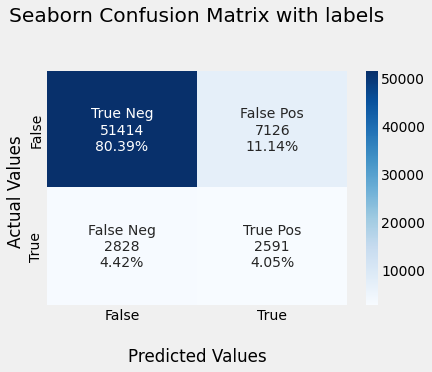

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
confusion_matrix = metrics.confusion_matrix(y_test, prediction)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
pred= model.predict(x_test)
accuracy_score(y_test,prediction)


0.8443690489219656

In [ ]:

#Score Report
print(classification_report(y_test, prediction))
from sklearn.metrics import confusion_matrix
# Confusion Matrices 
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     58540
           1       0.27      0.48      0.34      5419

    accuracy                           0.84     63959
   macro avg       0.61      0.68      0.63     63959
weighted avg       0.89      0.84      0.86     63959

[[51414  7126]
 [ 2828  2591]]


In [ ]:
models =  myList1 + myList2 + myList3 + myList4 
accuracy_scores = []
for model in models:
    accuracy_scores.append(model)
print(accuracy_scores)

[0.9073937991525821, 0.9102081020653856, 0.8650385403148892, 0.8650385403148892]


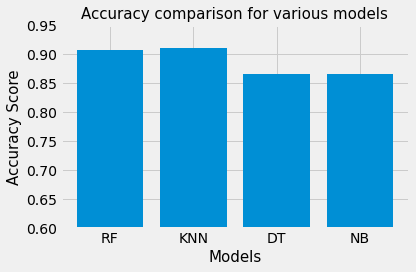

In [ ]:
plt.bar(['RF', 'KNN', 'DT', 'NB'], accuracy_scores)
plt.ylim(0.6,0.95)
plt.title('Accuracy comparison for various models', fontsize=15, color='black')
plt.xlabel('Models', fontsize=15, color='black')
plt.ylabel('Accuracy Score', fontsize=15, color='black')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

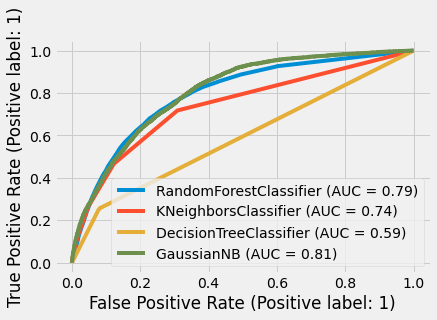

In [ ]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from IPython.display import display
#!pip3 install pyvirtualdisplay
disp=plot_roc_curve(model1,x_test,y_test)
plot_roc_curve(model2,x_test,y_test,ax=disp.ax_)
plot_roc_curve(model3,x_test,y_test,ax=disp.ax_)
plot_roc_curve(model4,x_test,y_test,ax=disp.ax_)


**Yahaan tk haa Filhal Neeche Purane code hain ----------------------------------------------------------------**

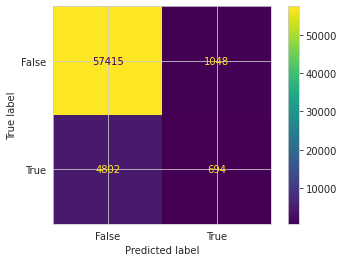

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, testing)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
knn_auc = roc_auc_score(y_test, testing)
print('KNN: ROC AUC=%.3f' % (knn_auc))
lr_fpr, lr_tpr, _ = roc_curve(y_test, testing)

KNN: ROC AUC=0.554


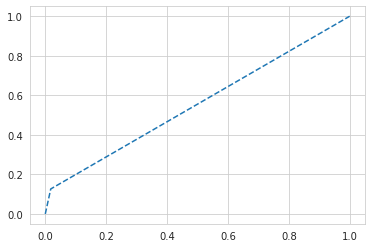

In [ ]:
import matplotlib
from matplotlib import pyplot
pyplot.plot(lr_fpr, lr_tpr,linestyle='--', label='knn')

In [ ]:
#Score Report
print(classification_report(y_test, prediction))
from sklearn.metrics import confusion_matrix
# Confusion Matrices 
print(confusion_matrix(y_test,prediction))


              precision    recall  f1-score   support

           0       0.95      0.88      0.91     58487
           1       0.27      0.49      0.35      5472

    accuracy                           0.84     63959
   macro avg       0.61      0.68      0.63     63959
weighted avg       0.89      0.84      0.86     63959

[[51270  7217]
 [ 2793  2679]]


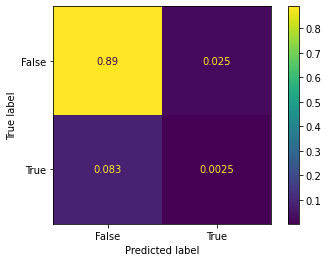

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, testing)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix/np.sum(confusion_matrix), display_labels = [False, True])

cm_display.plot()
plt.show()

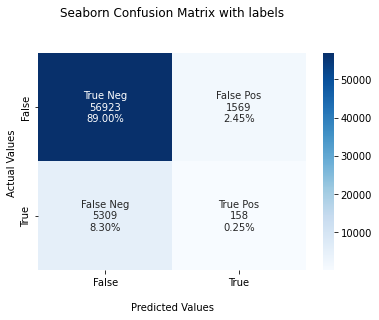

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()